In [24]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *
from fig_gen import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-20 12:03.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]
--- ccdf ---
>0.05: 90.48%
>0.1: 81.16%
>0.15: 70.55%
>0.2: 58.86%
>0.25: 46.61%
>0.3: 34.58%
>0.35: 25.74%
>0.4: 14.75%


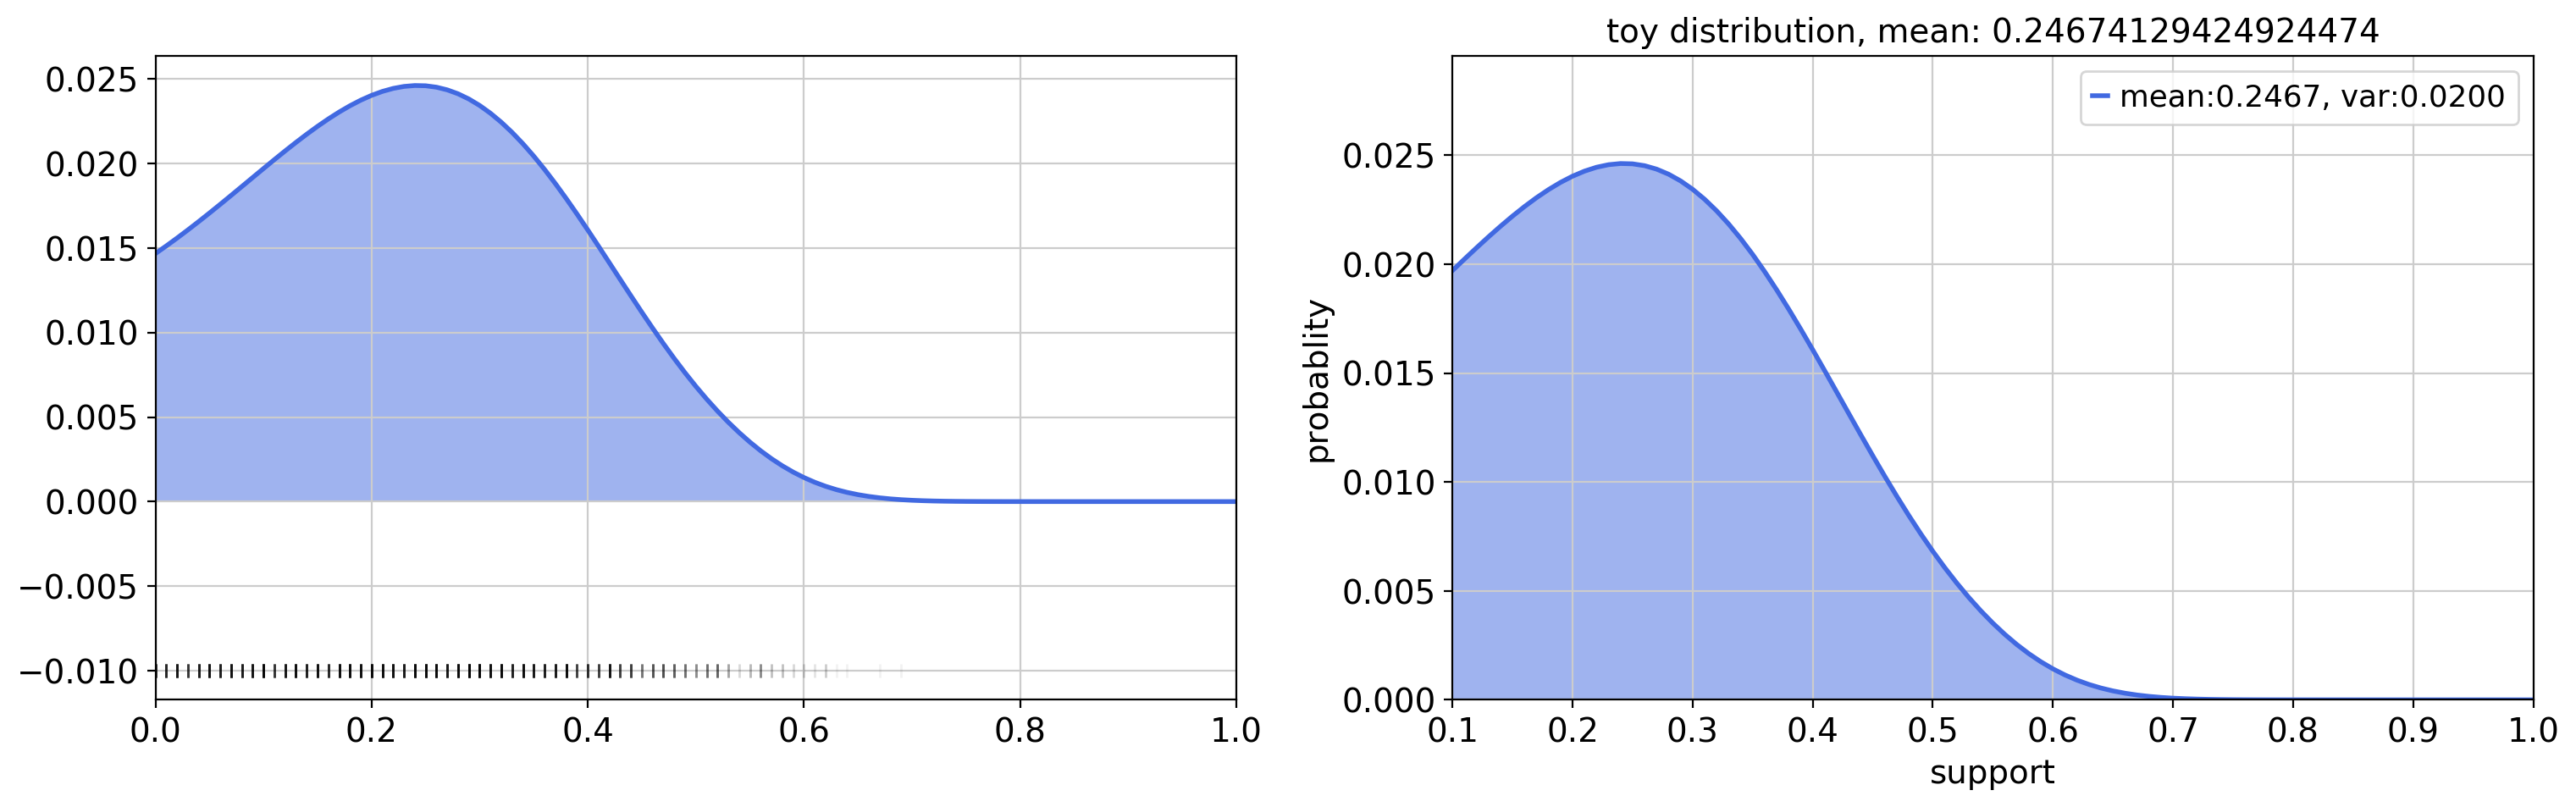

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

In [ ]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/pbmc8k_filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/pbmc8k_filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/pbmc8k_filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

Memory usage: current 0.25 GB, difference +0.25 GB
CPU times: user 1.54 s, sys: 169 ms, total: 1.71 s
Wall time: 1.88 s


CST3
Average counts per cell = 7.001789762558167


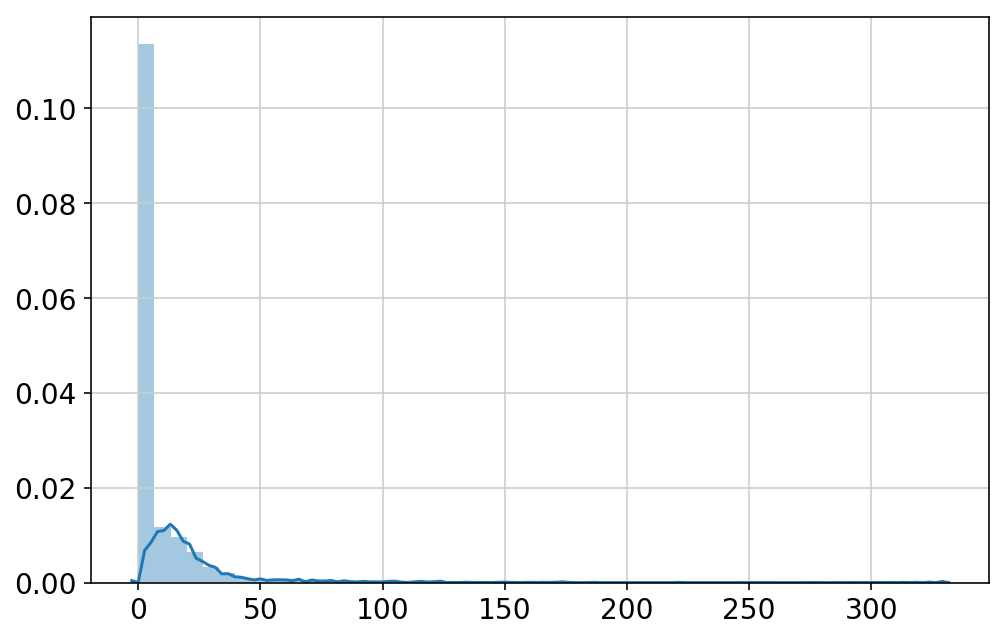

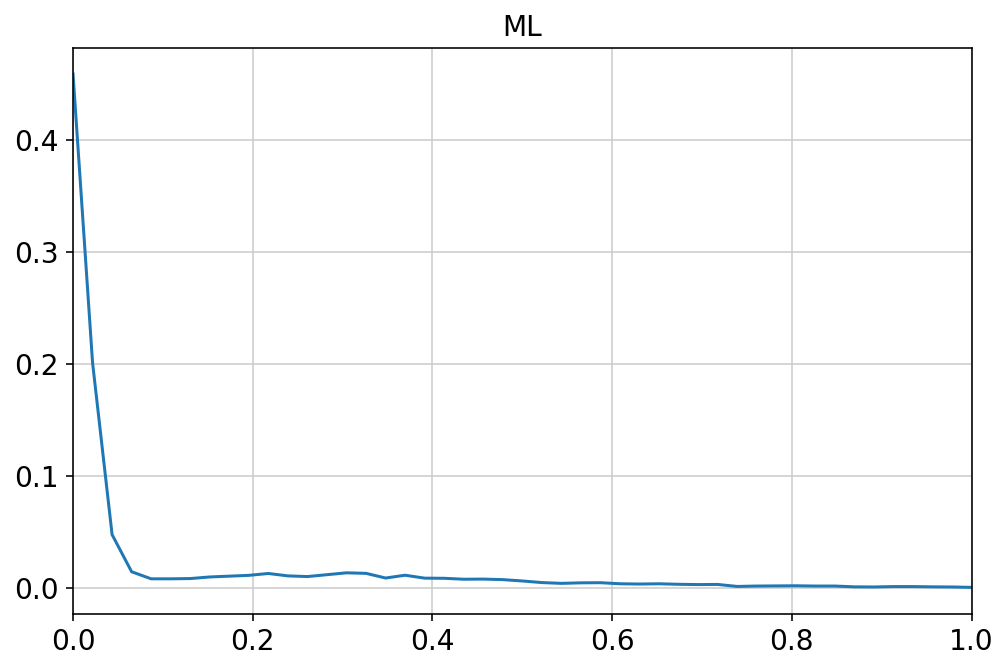

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 46

### debug: proportion separation ### start ###


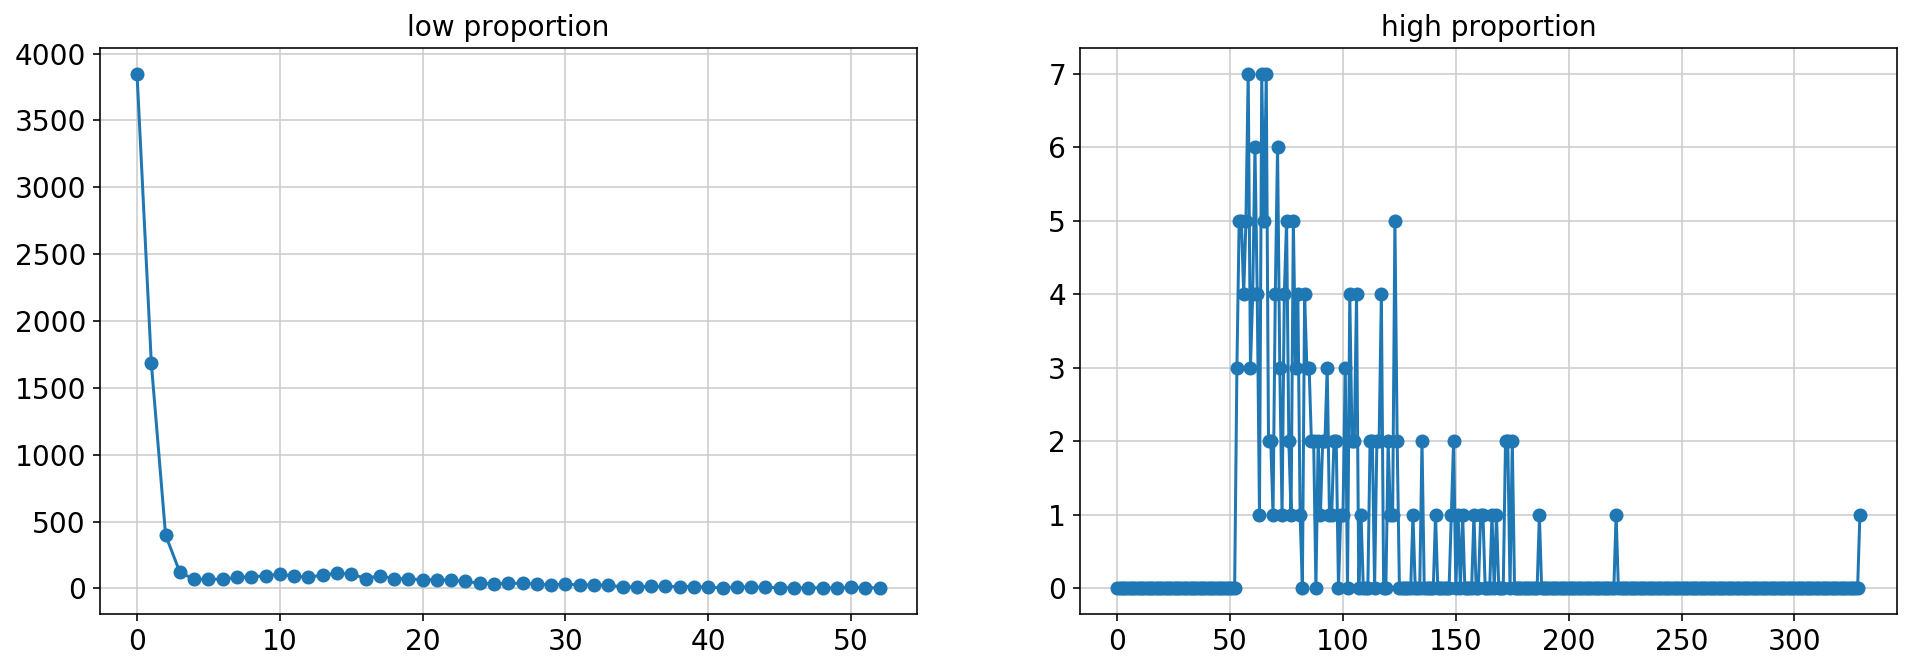

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.525126932604536
-0.04226043781585531
-0.16284002457567226
-0.2030872963132424
-0.11703928359807492
Close-form gradients
[ 0.52512696 -0.04226042 -0.16284001 -0.20308727 -0.11703926]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.223854929268721, reg:0.0029284412420628875
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  4.91505928  -4.6073475   10.21681007 -11.88392529   1.35932971]
gamma:46


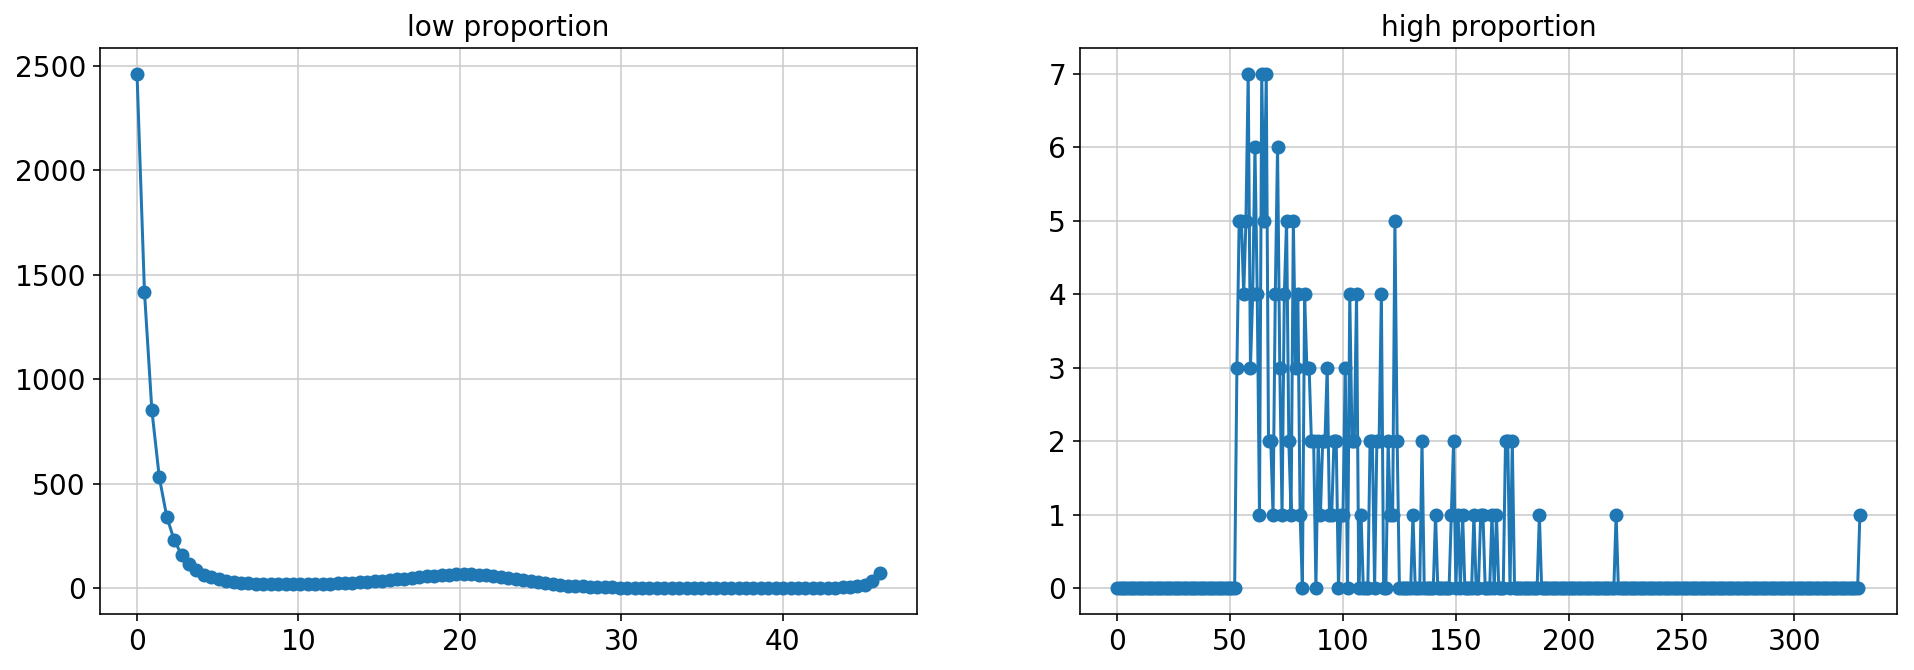

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:329.0


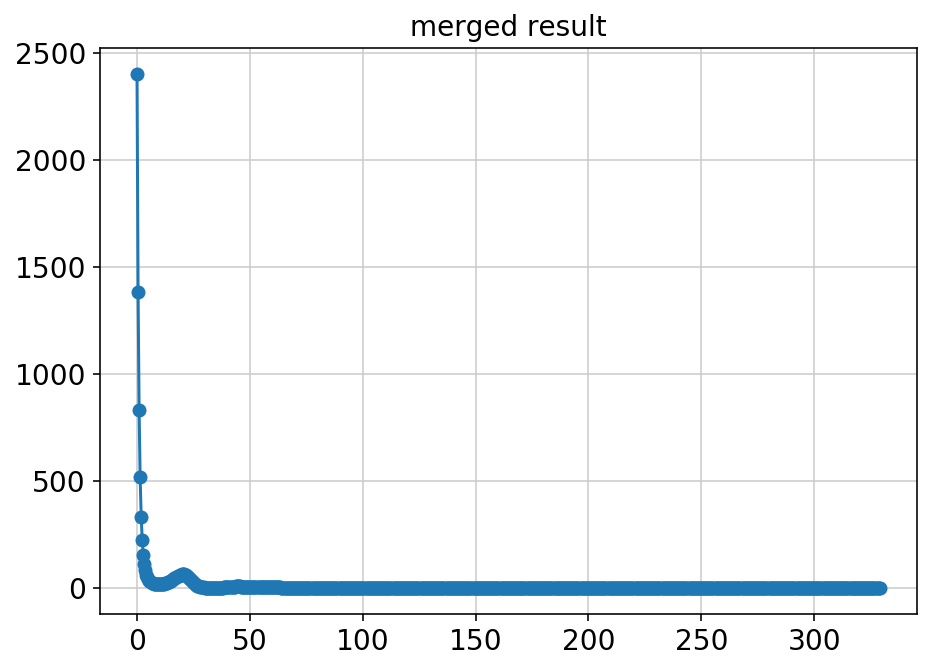

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 17.33%
>0.1: 4.123%
>0.15: 2.680%
>0.2: 1.714%
>0.25: 1.119%
>0.3: 0.747%
>0.35: 0.455%
>0.4: 0.279%


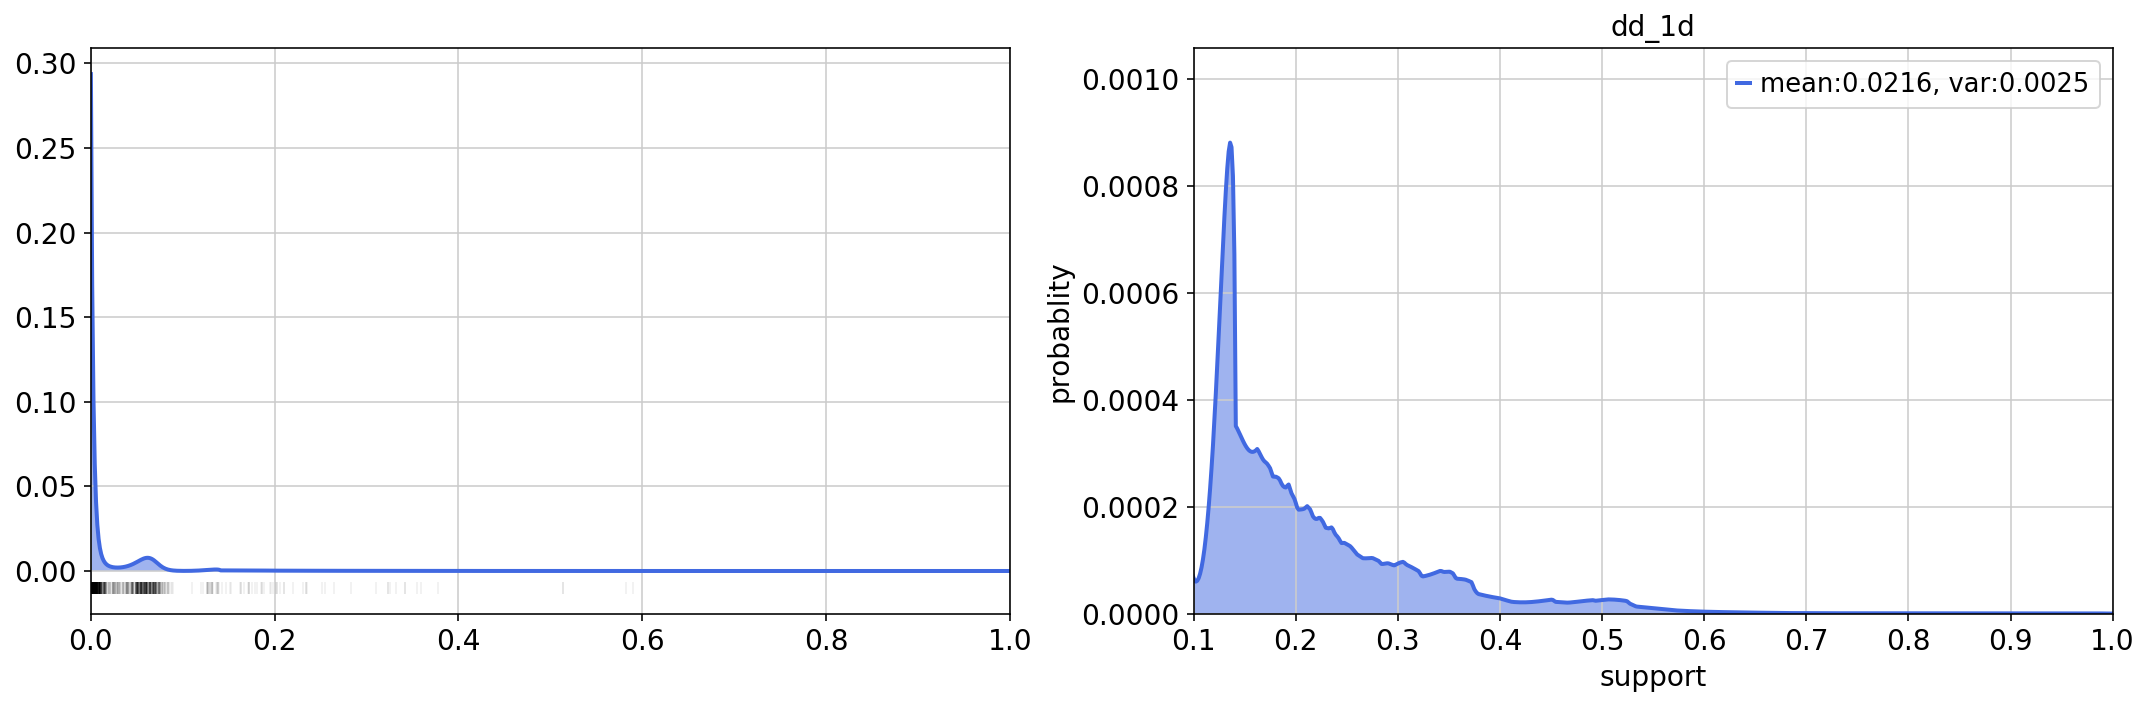

estimated gamma: 329.0
### N_r=469, mean_cts=9, N_c=10000


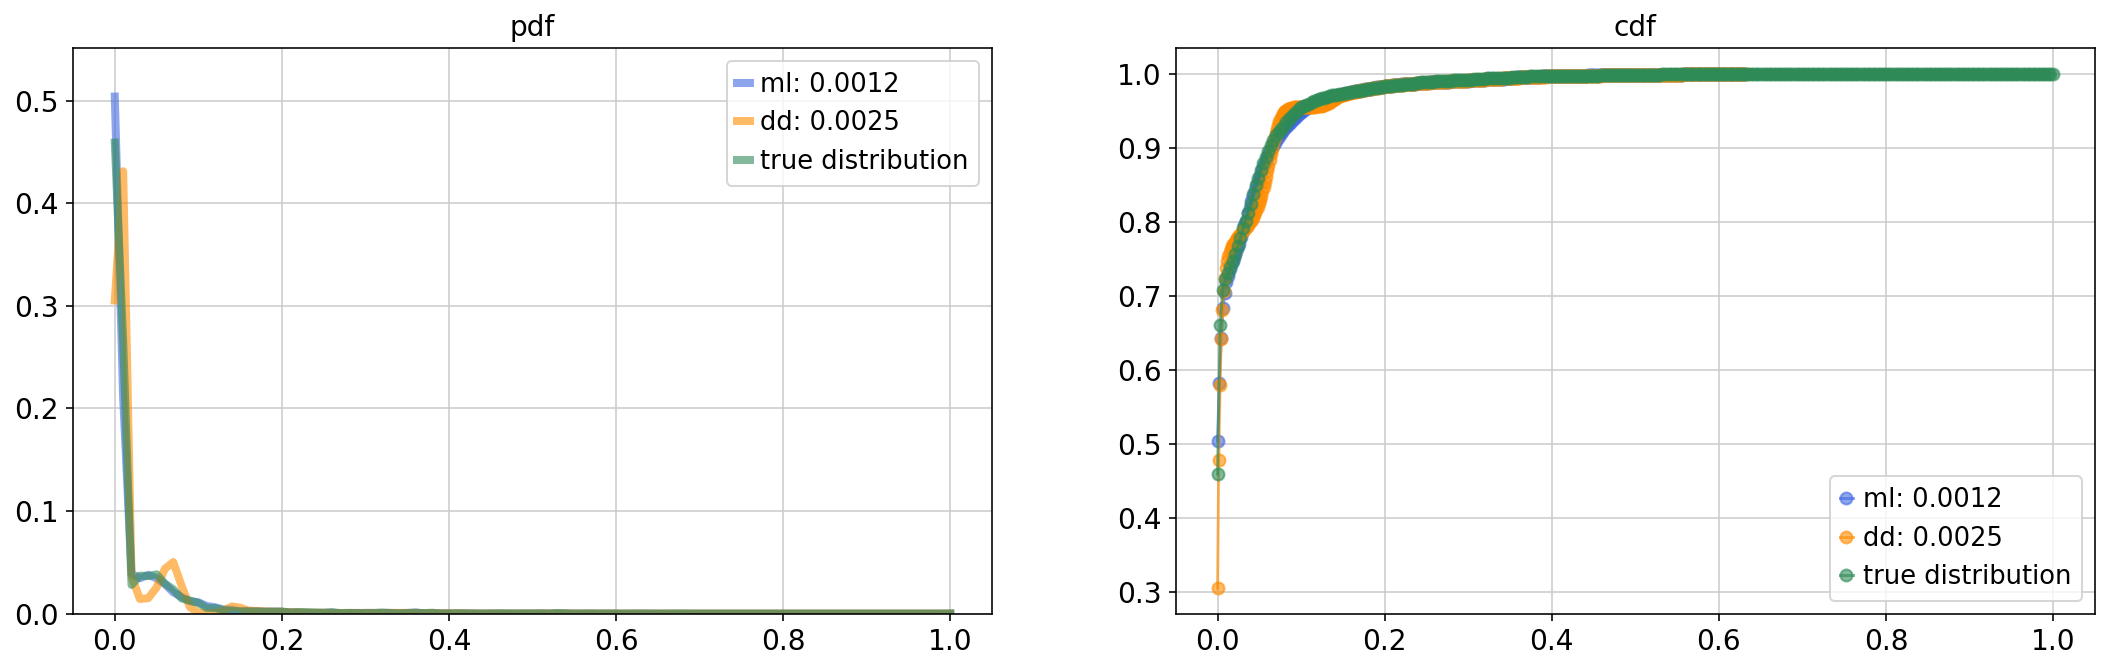



### N_r=4698, mean_cts=99, N_c=1000


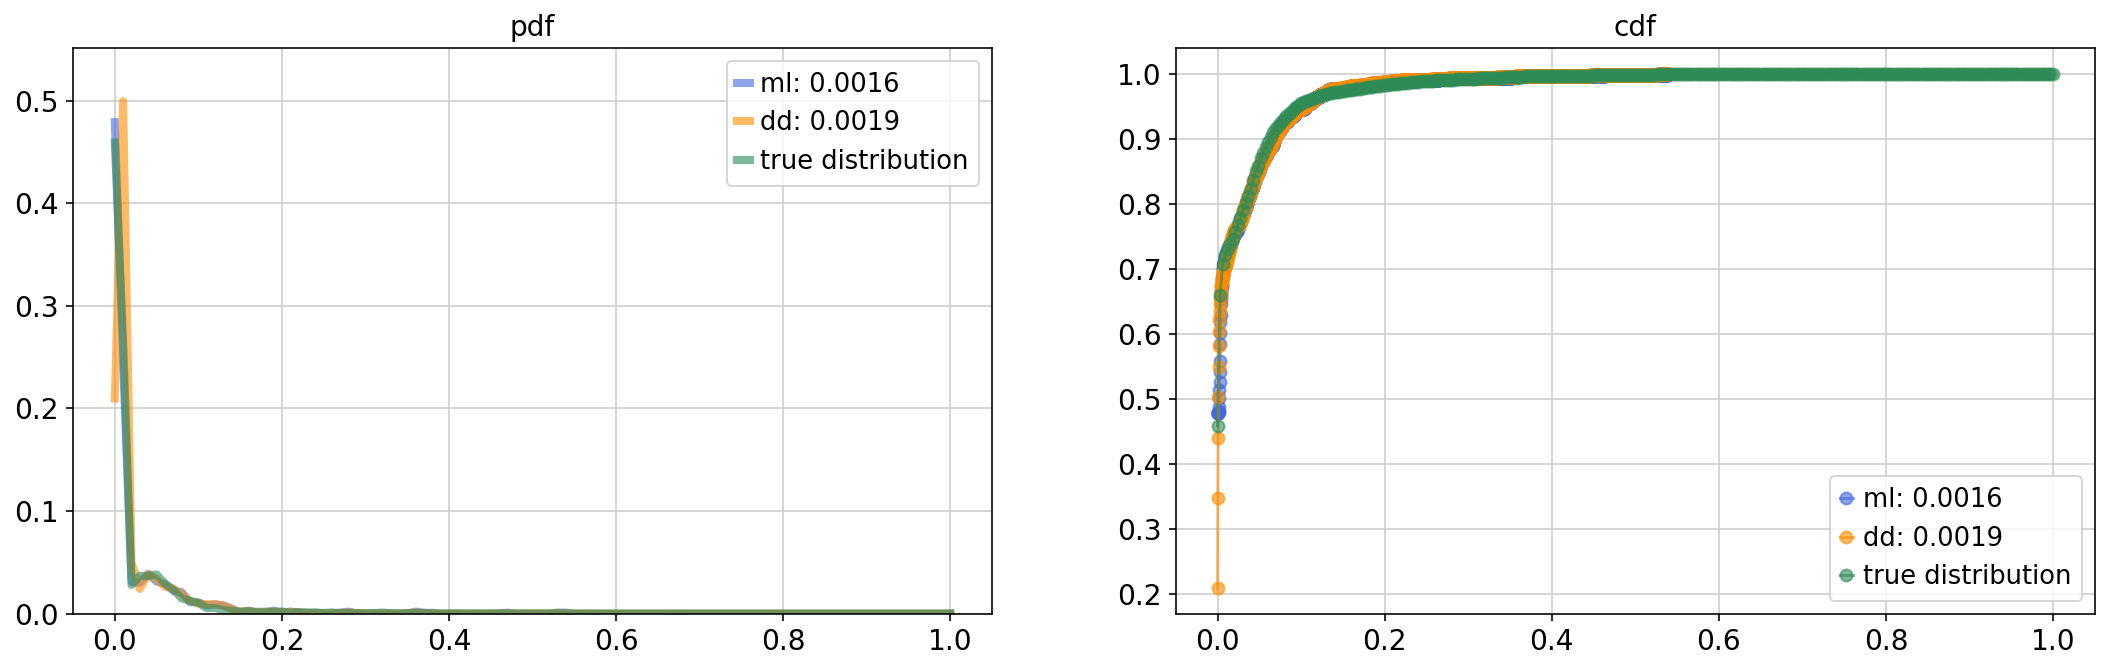

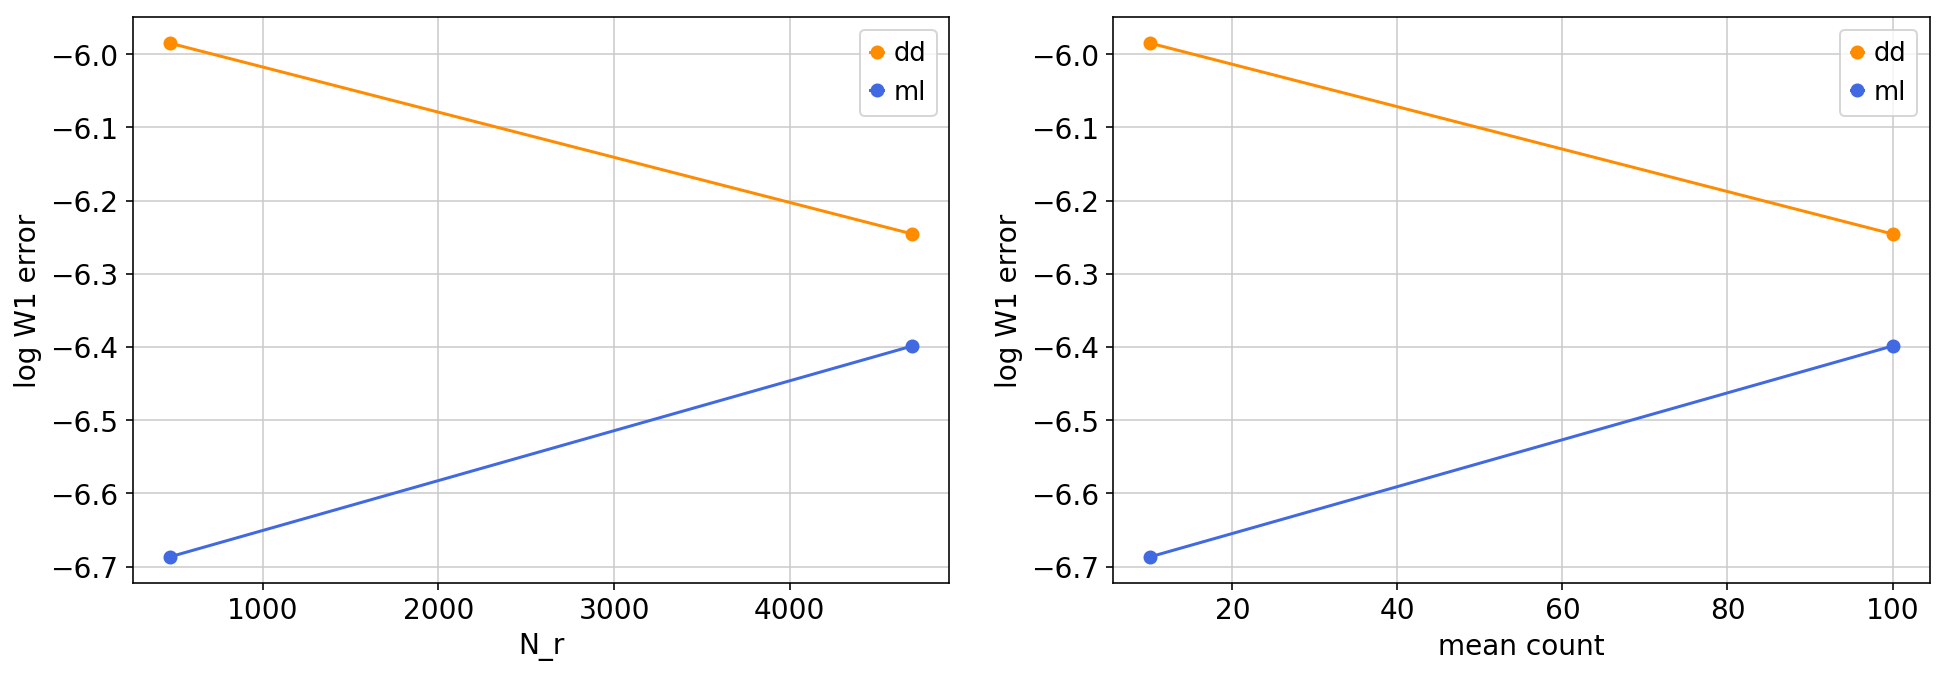

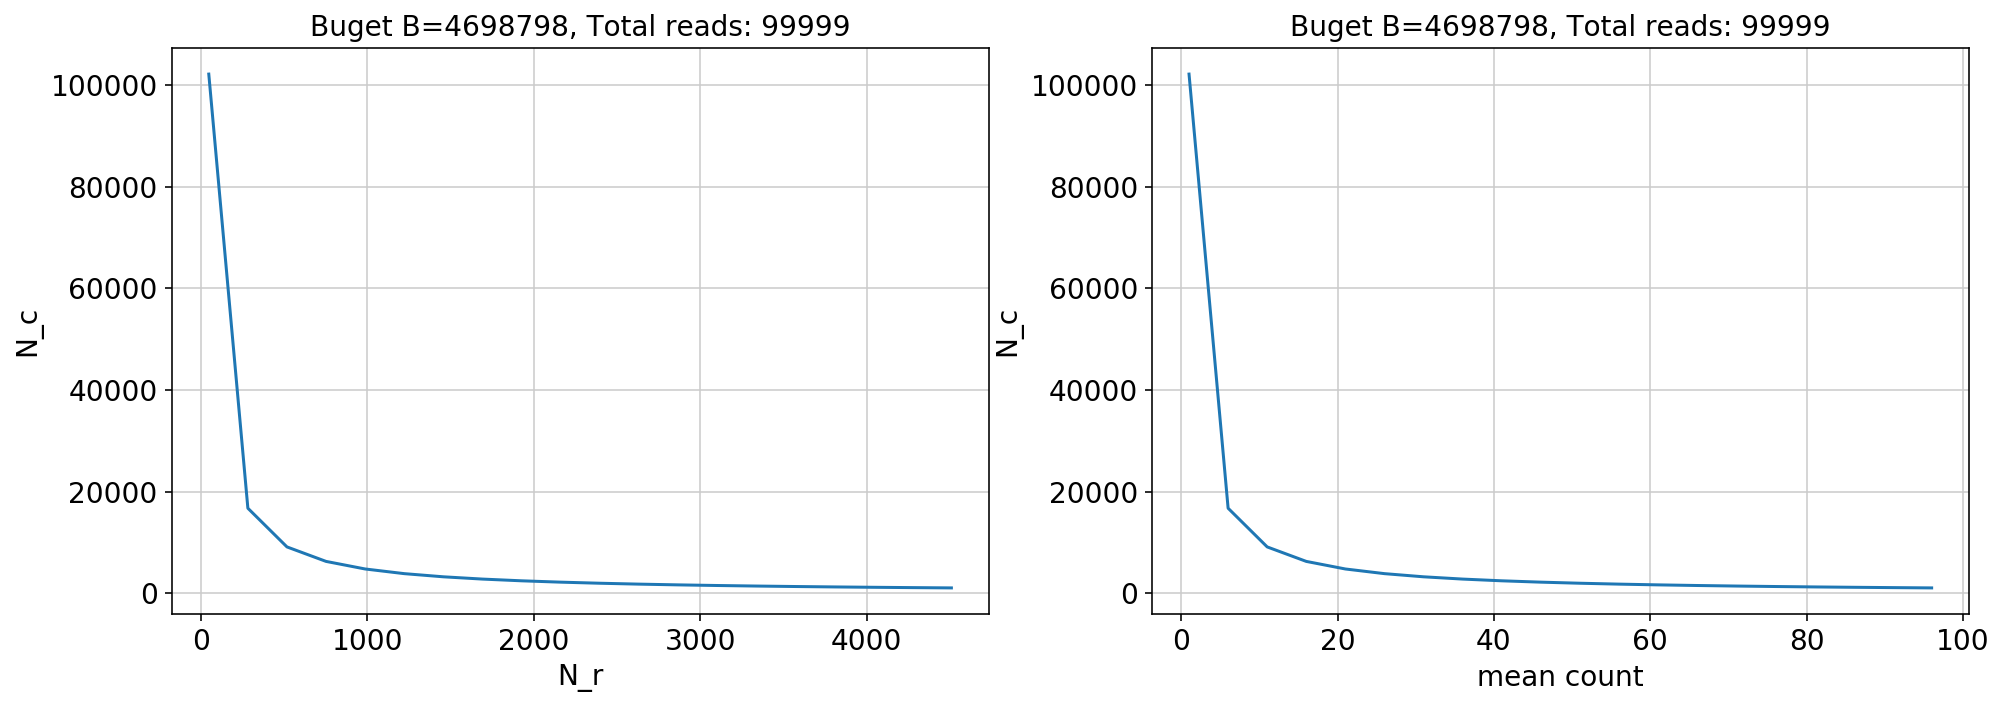

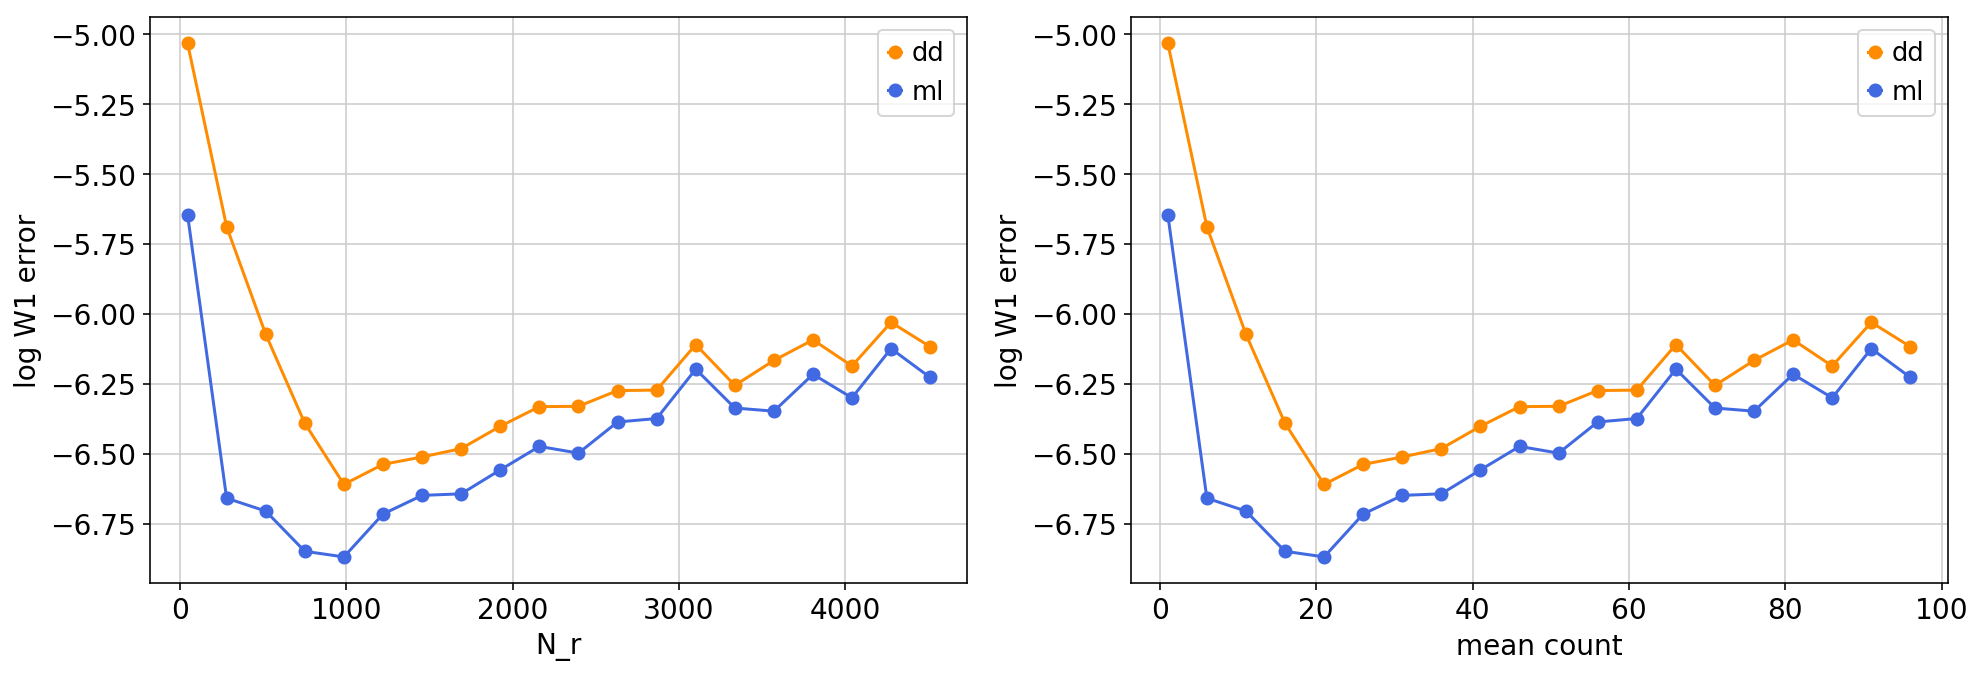

In [35]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

p_gene,x_gene = counts2pdf_1d(Y)
x_gene = x_gene/x_gene.max()
comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
tradeoff_1d(p_gene,x_gene,1e5)

In [41]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)

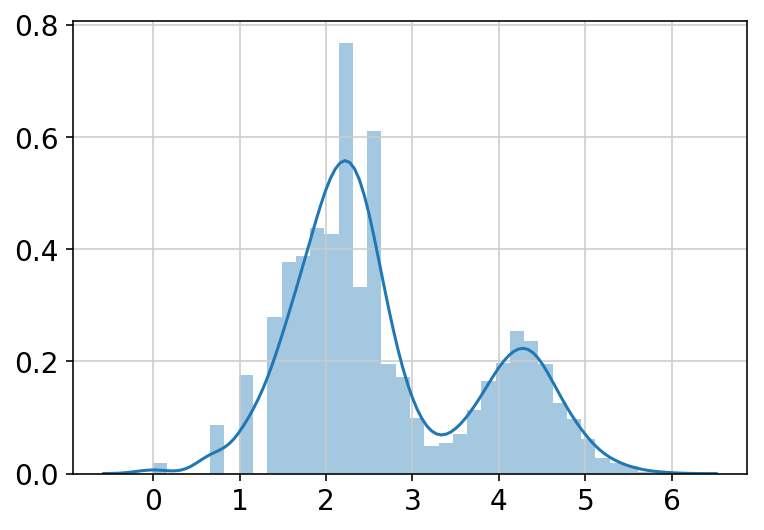

In [42]:
plt.figure()
sns.distplot(np.log(Y+1))
plt.show()

FTL
Average counts per cell = 27.60064431452094


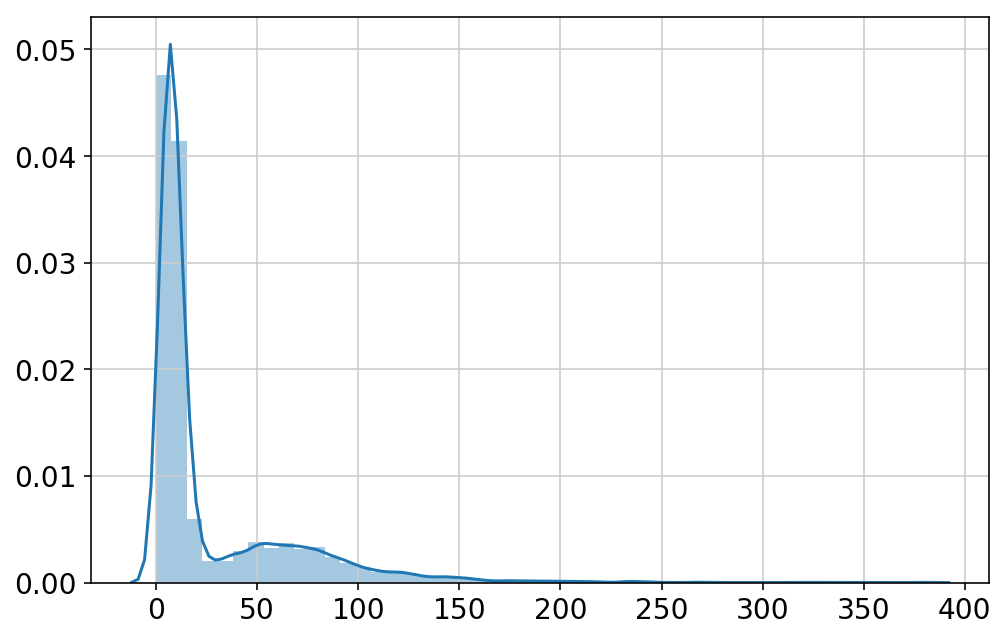

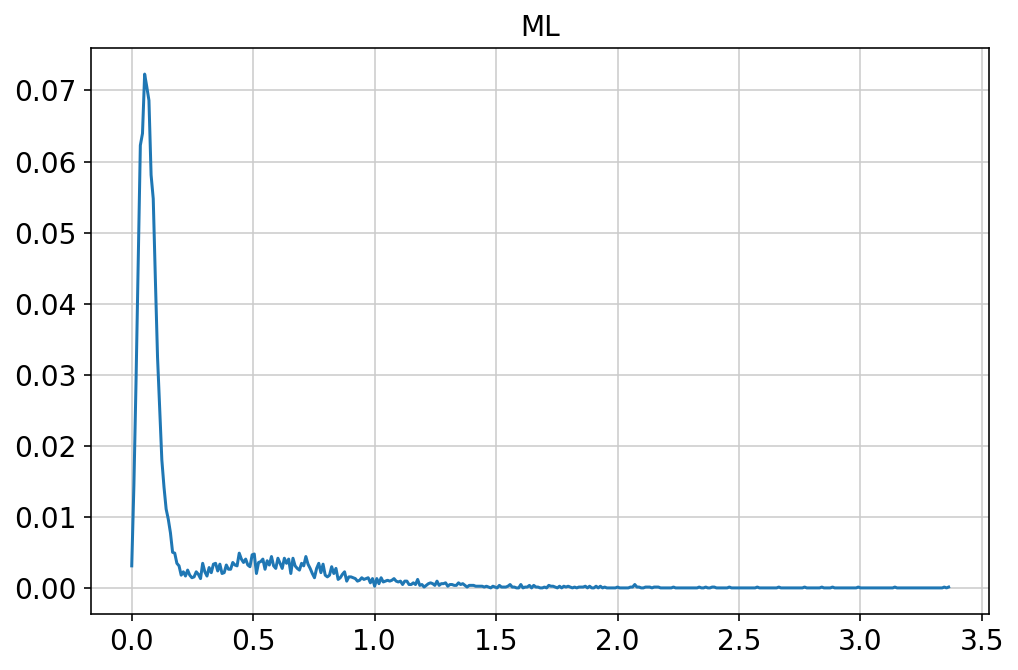

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 113

### debug: proportion separation ### start ###


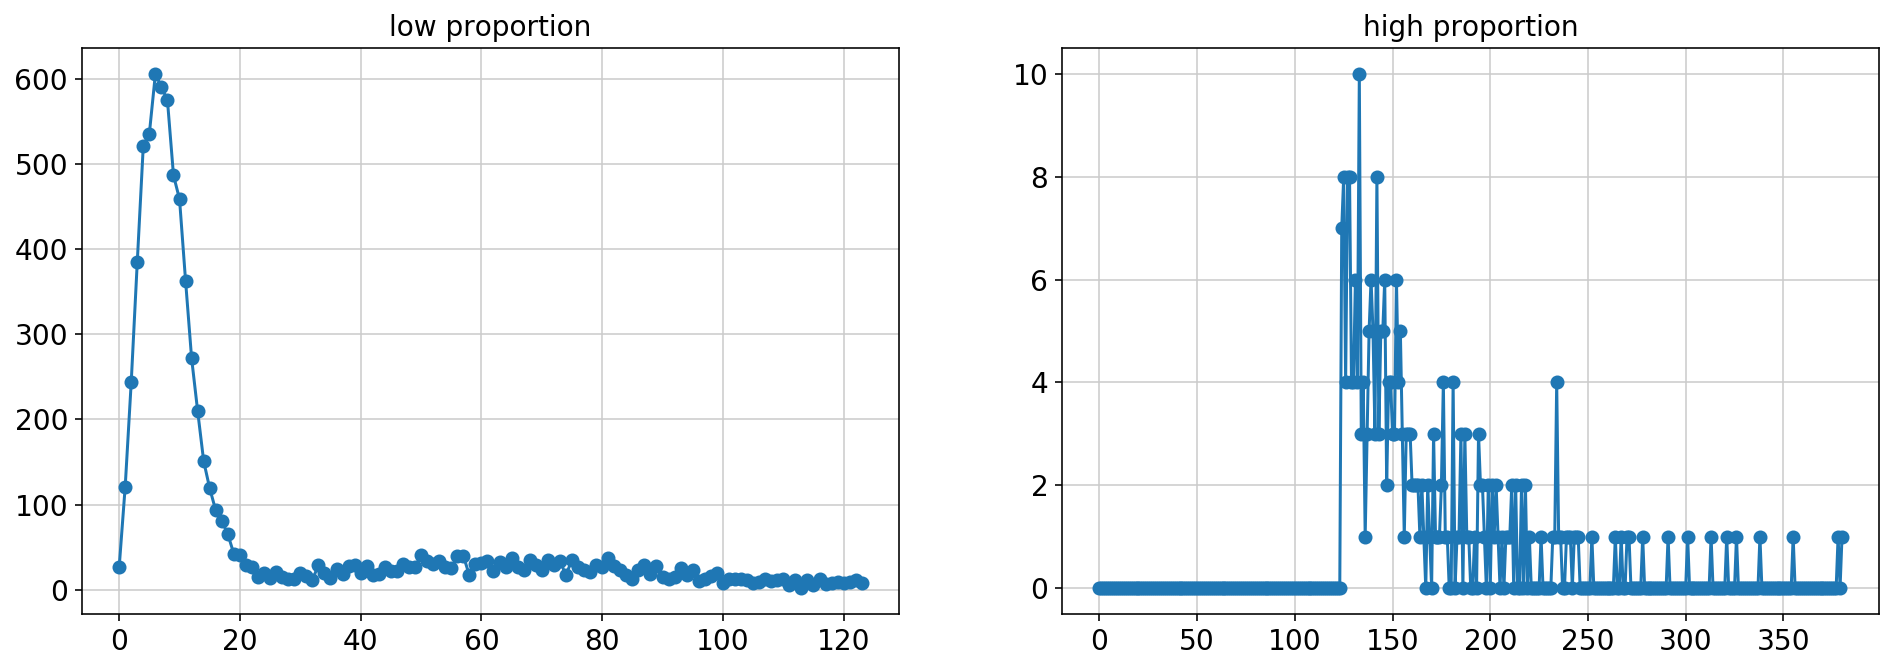

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.332271206104906
0.061724680477937
-0.13331529569171607
-0.16493457088984087
-0.09584613636093309
Close-form gradients
[ 0.33227123  0.0617247  -0.13331528 -0.16493455 -0.09584611]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:4.056760267652305, reg:0.0008341259986410189
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 2.81932515  2.84315969 -5.24880401  4.25100773 -4.6647013 ]
gamma:113


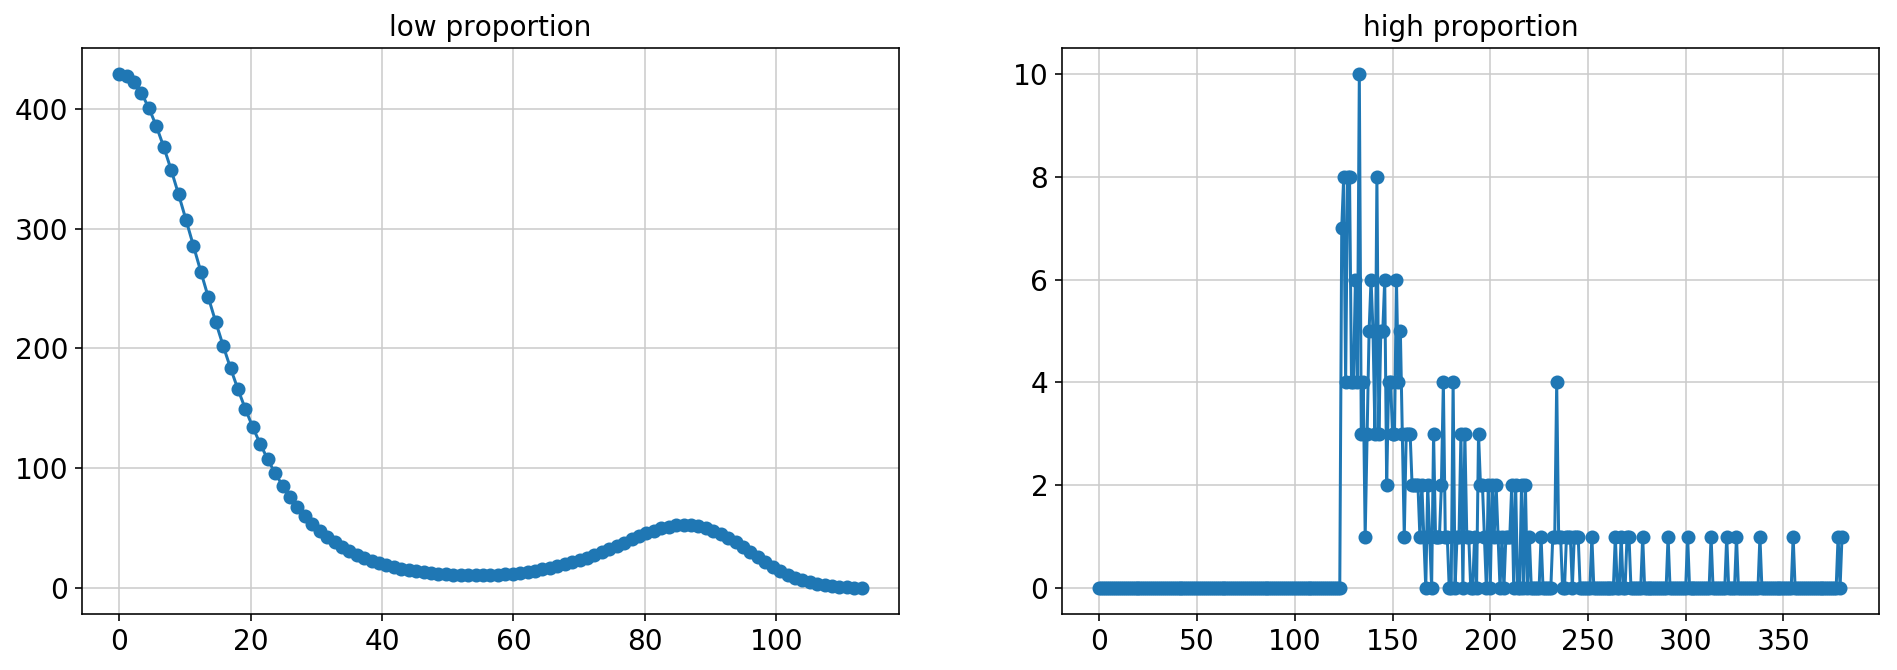

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:380.0


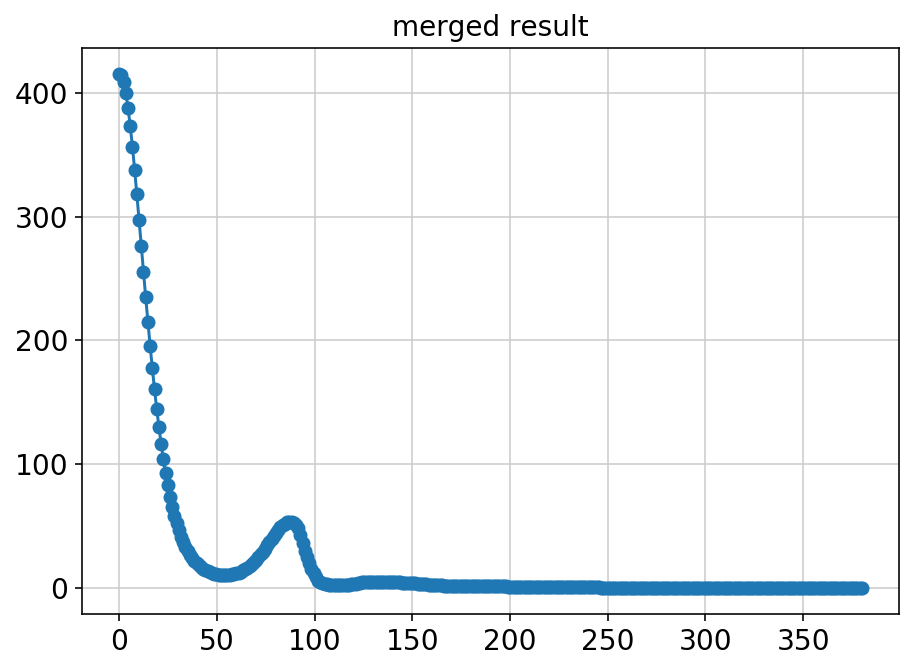

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 35.58%
>0.1: 21.28%
>0.15: 18.43%
>0.2: 14.32%
>0.25: 4.679%
>0.3: 3.258%
>0.35: 2.471%
>0.4: 1.556%


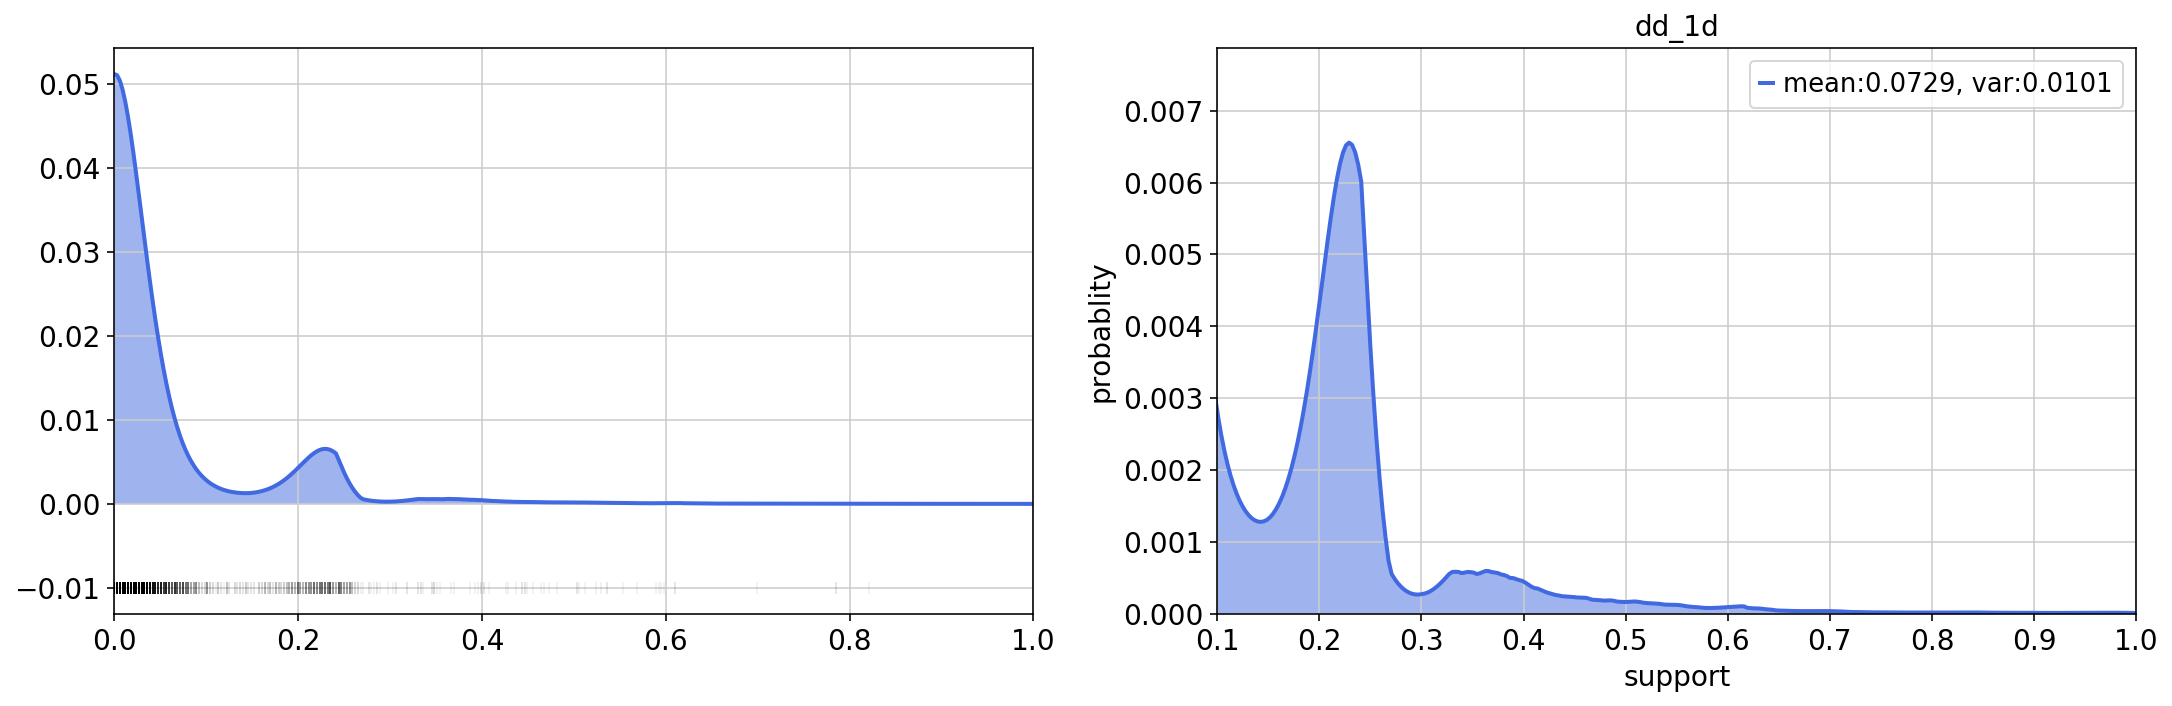

estimated gamma: 380.0


In [36]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,n_degree=5,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

### N_r=137, mean_cts=9, N_c=10000


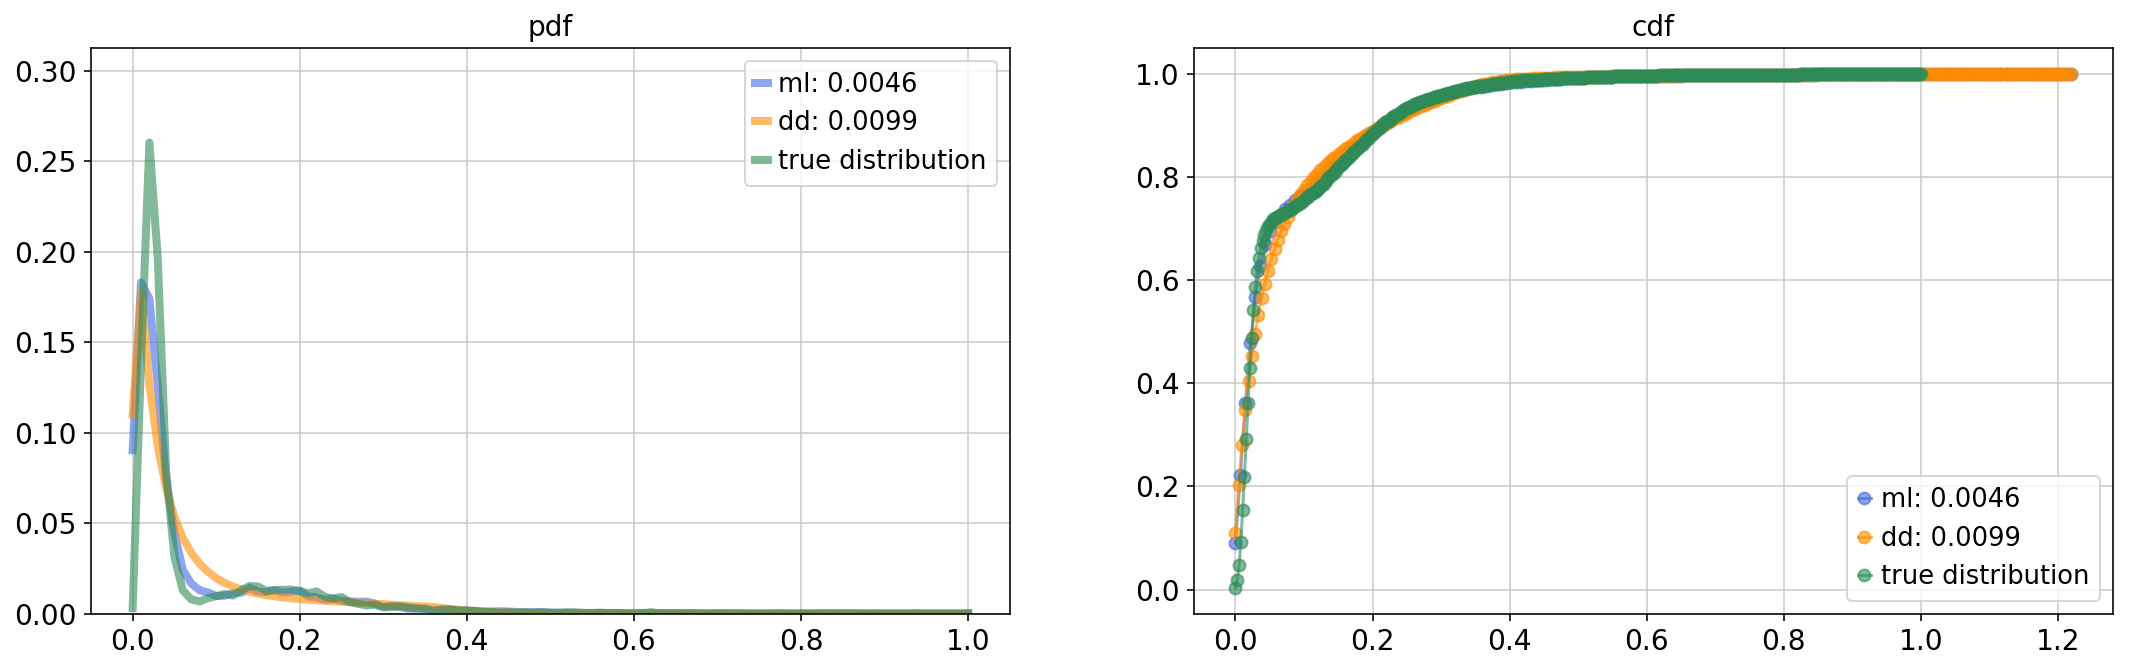



### N_r=1376, mean_cts=99, N_c=1000


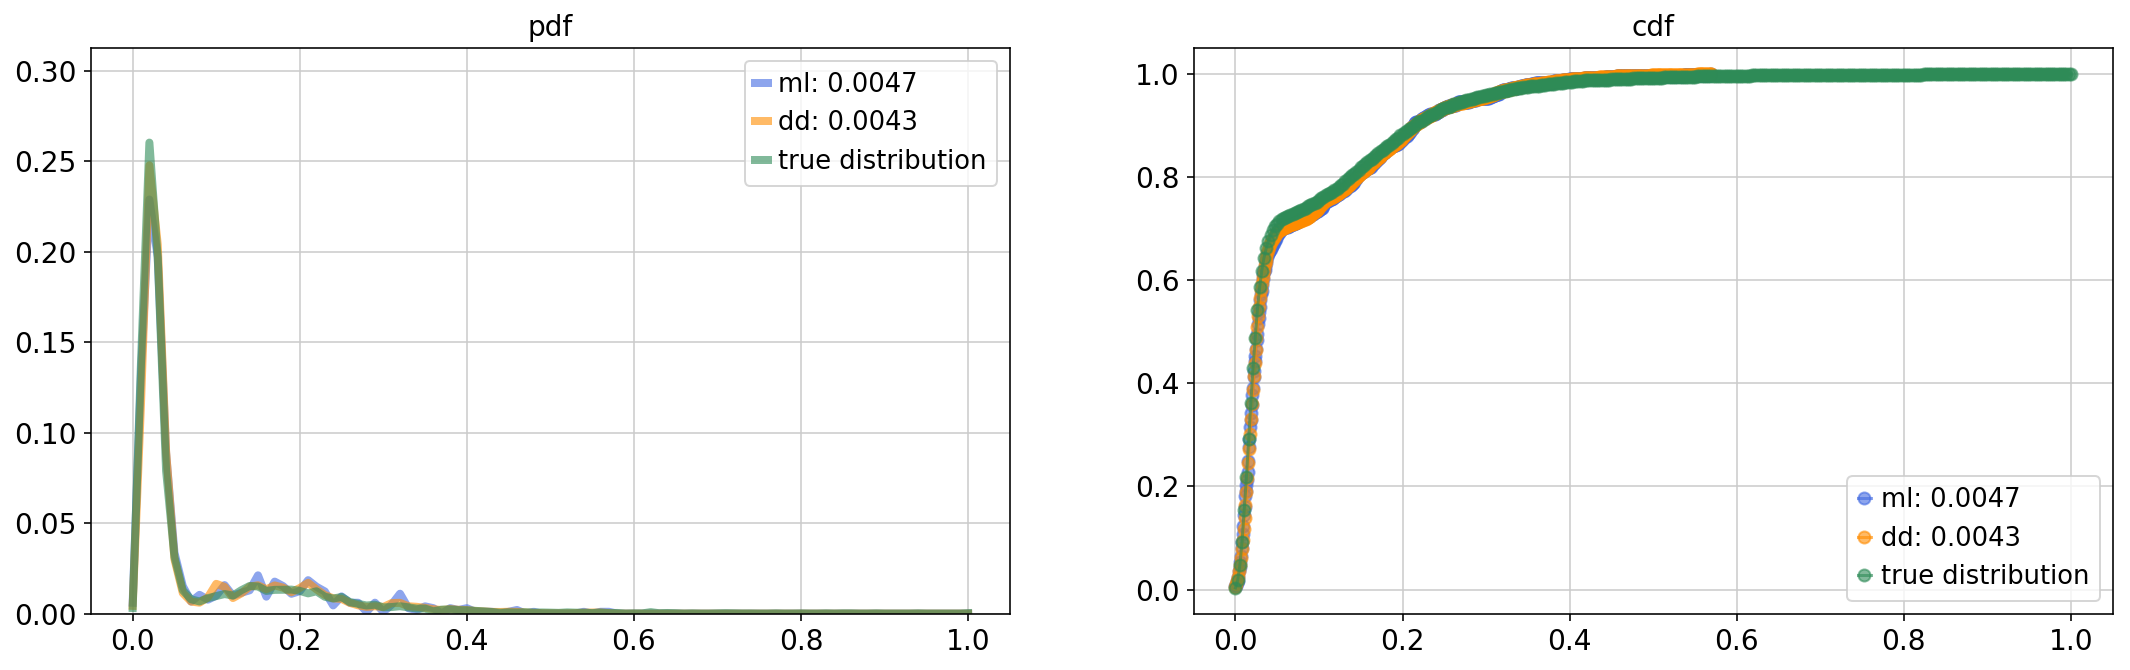

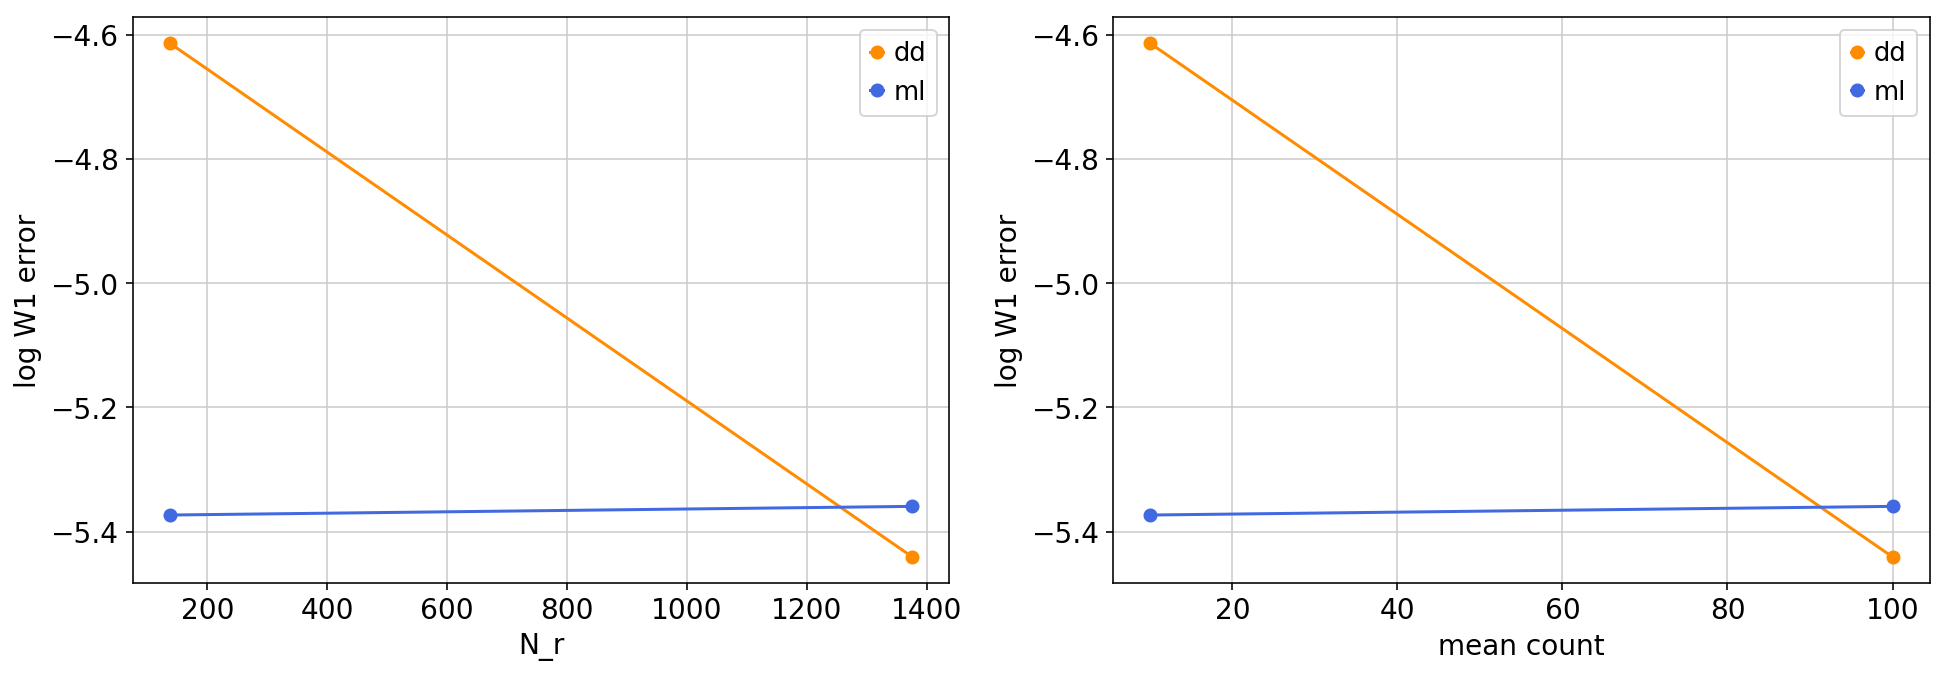

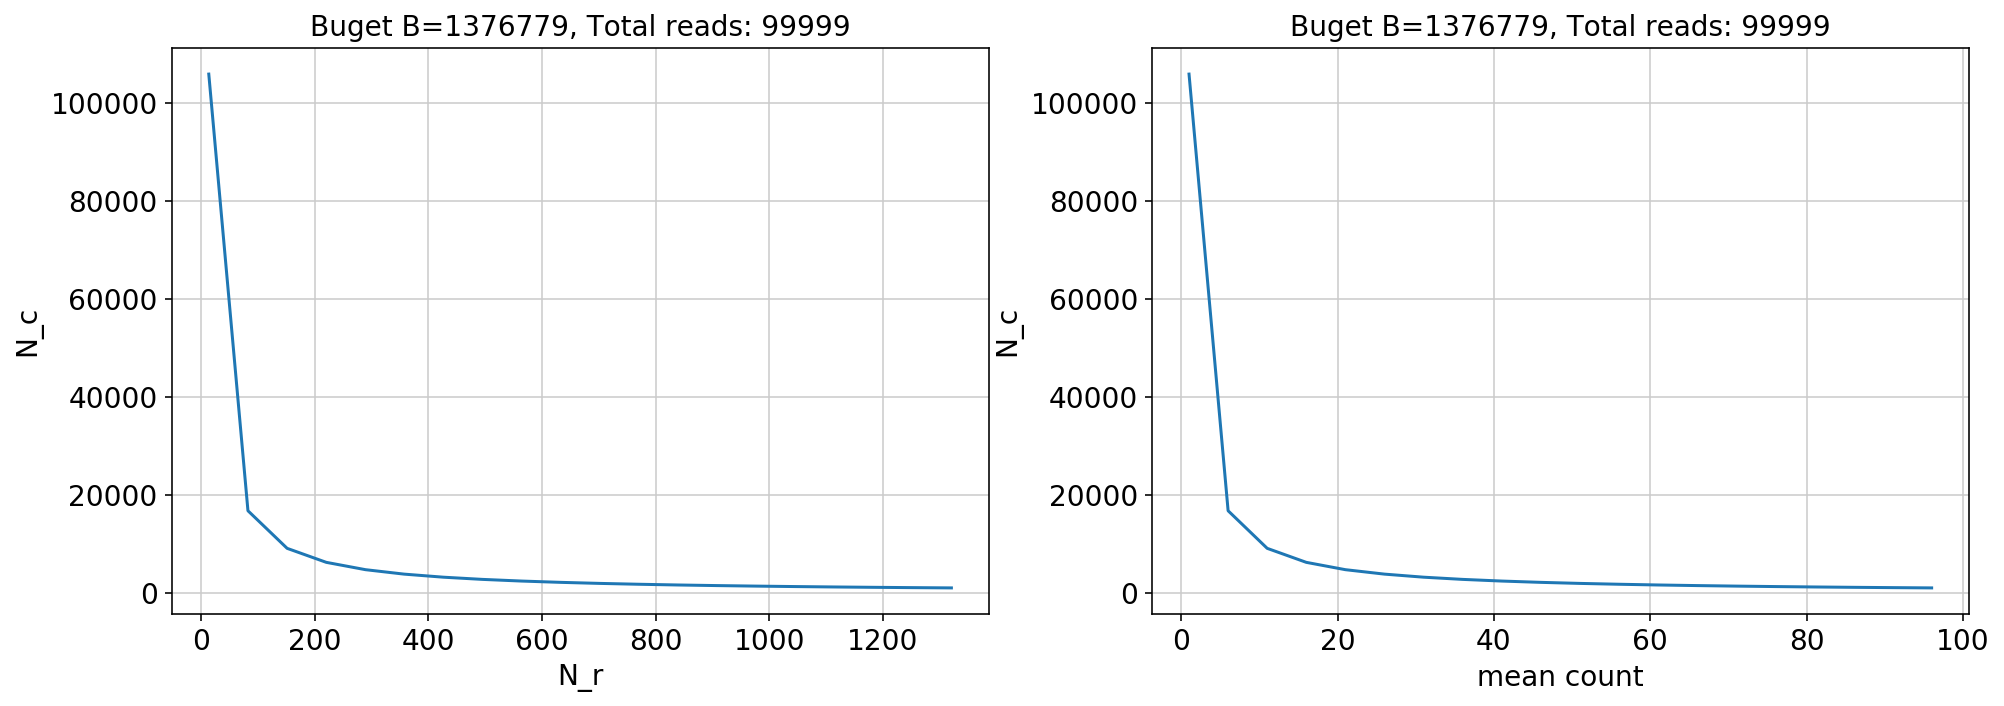

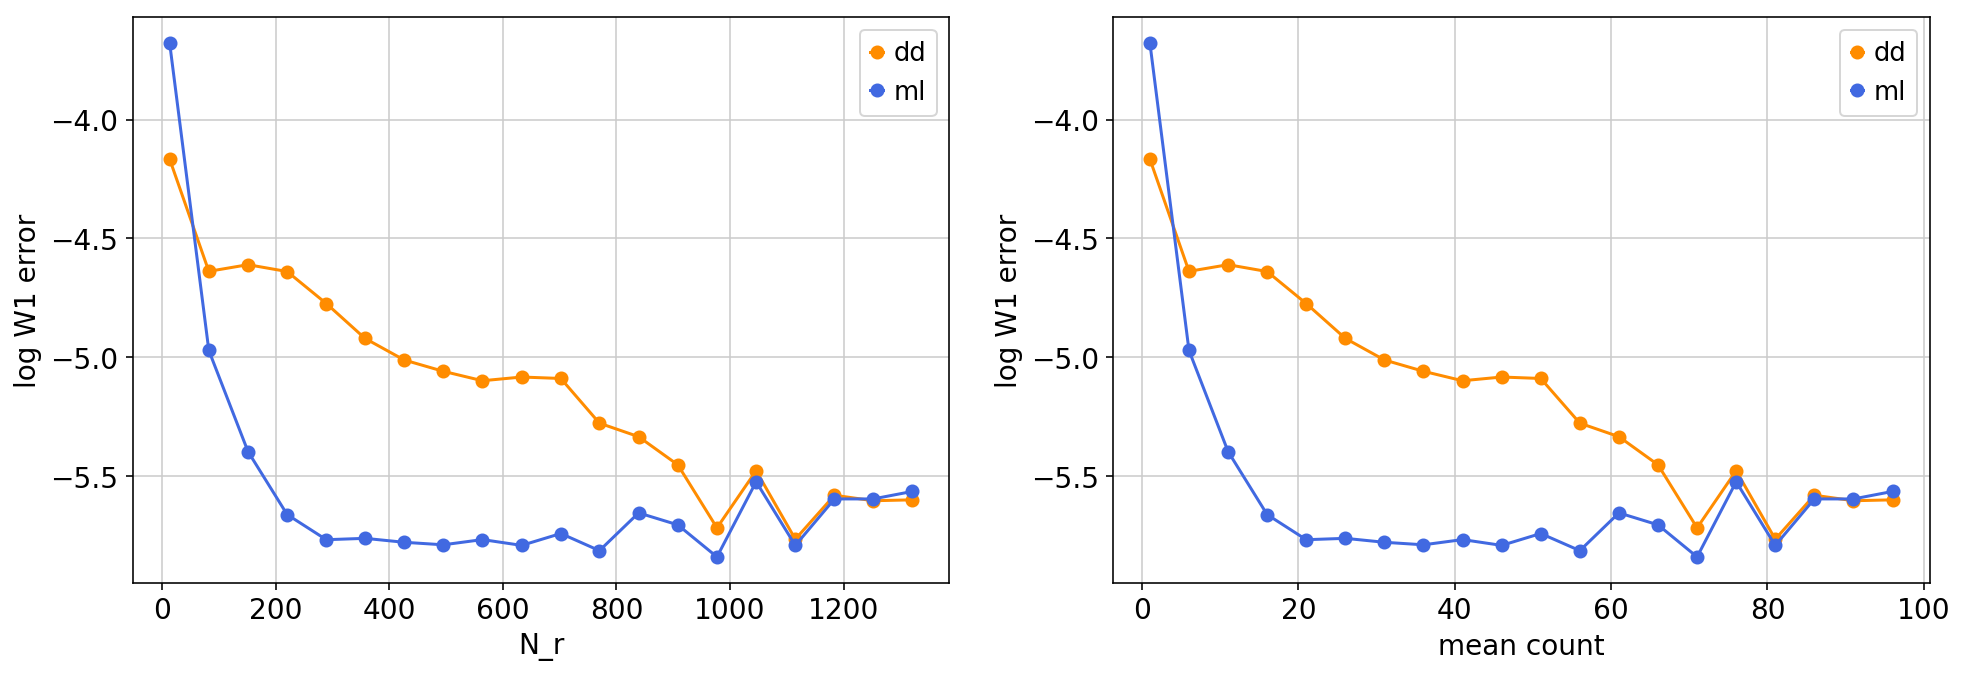

In [37]:
p_gene,x_gene = counts2pdf_1d(Y)
x_gene = x_gene/x_gene.max()
comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
tradeoff_1d(p_gene,x_gene,1e5)

In [ ]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


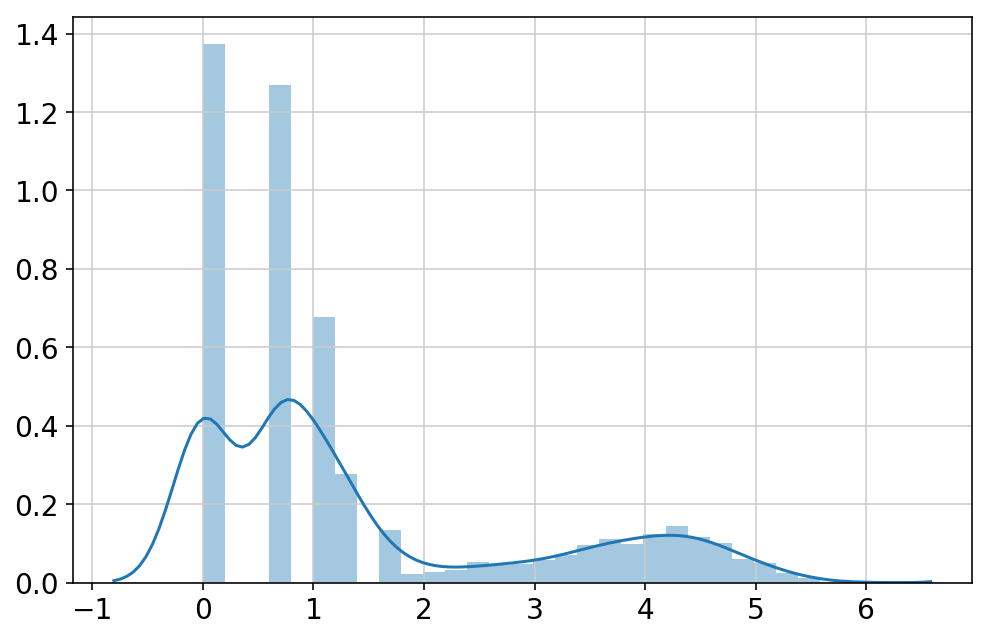

S100A8
Average counts per cell = 13.68273475718888


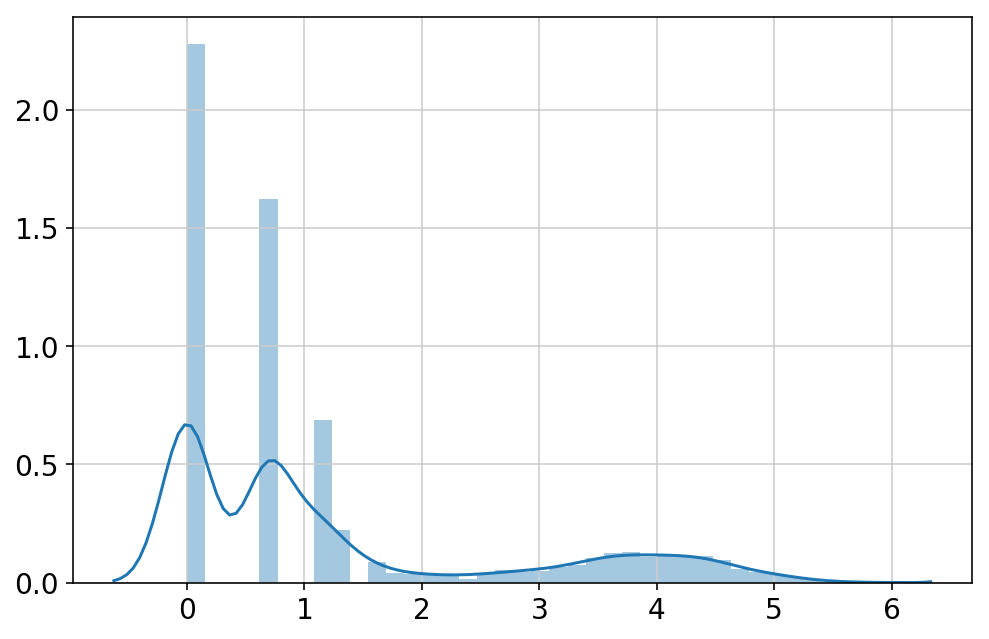

S100A4
Average counts per cell = 10.855745137811716


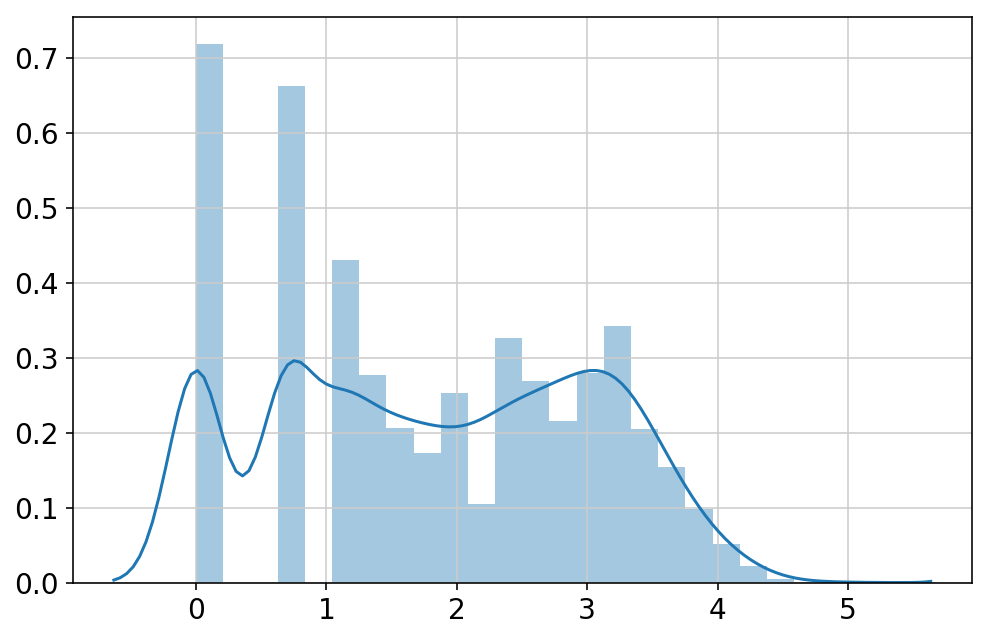

LGALS2
Average counts per cell = 1.2554587758024103


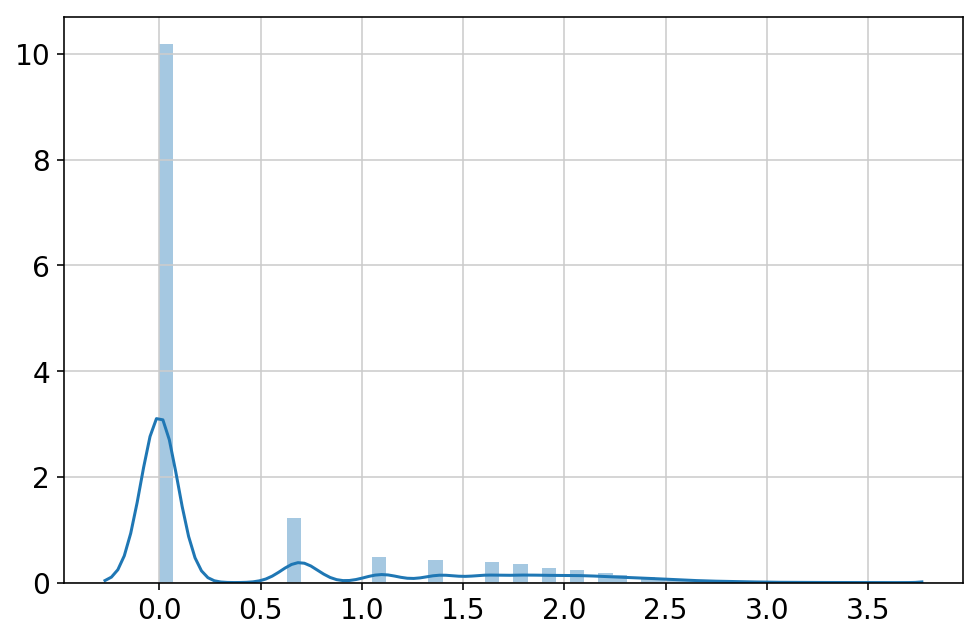

FCN1
Average counts per cell = 2.1746808256771266


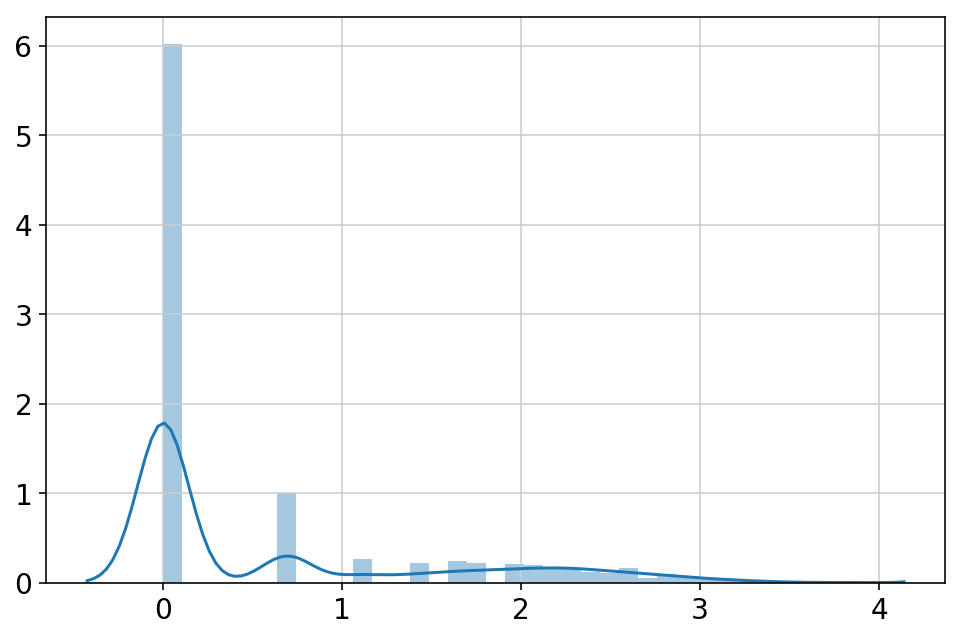

CD14
Average counts per cell = 0.6564849063357595


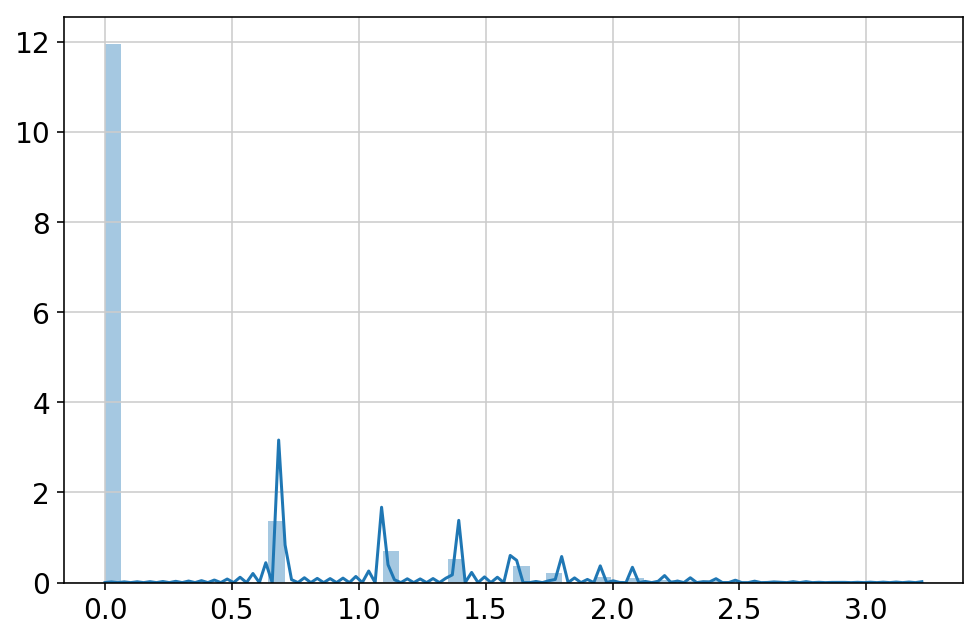

GZMB
Average counts per cell = 0.46116215248777


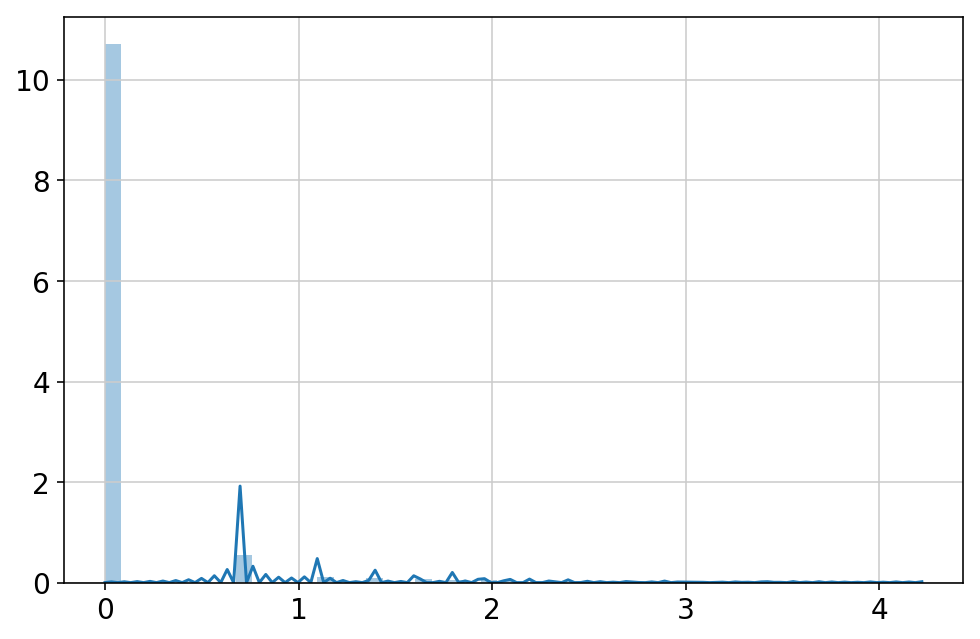

IGFBP7
Average counts per cell = 0.09760171817205585


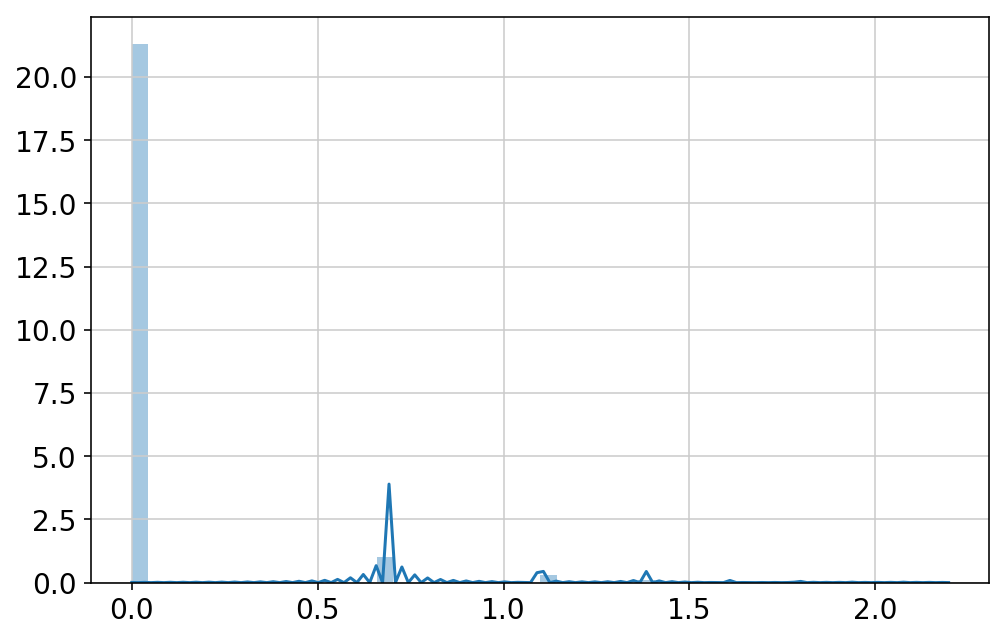

CD79A
Average counts per cell = 1.003937477627968


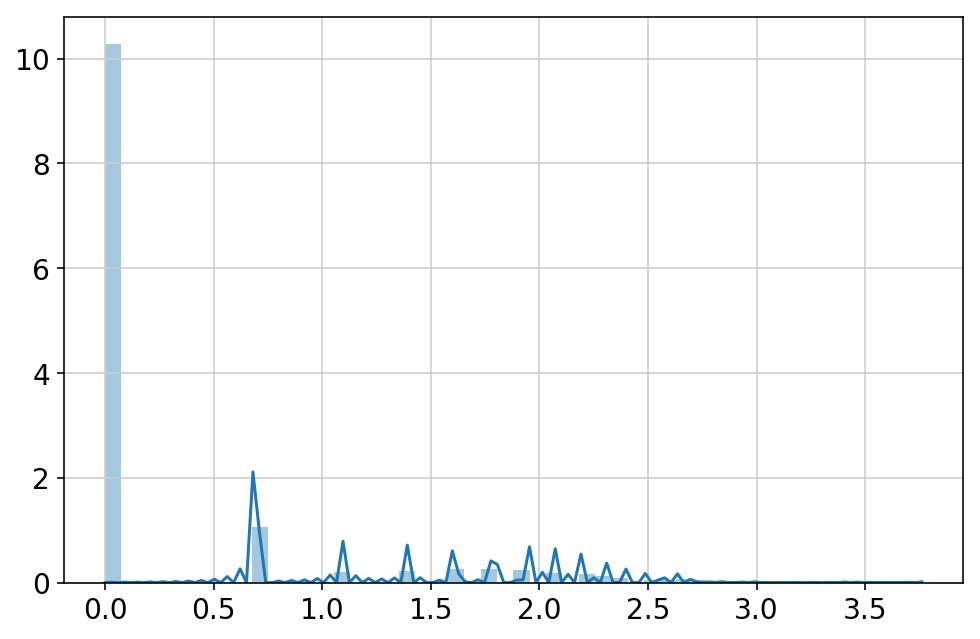

CD3E
Average counts per cell = 1.6037465696217634


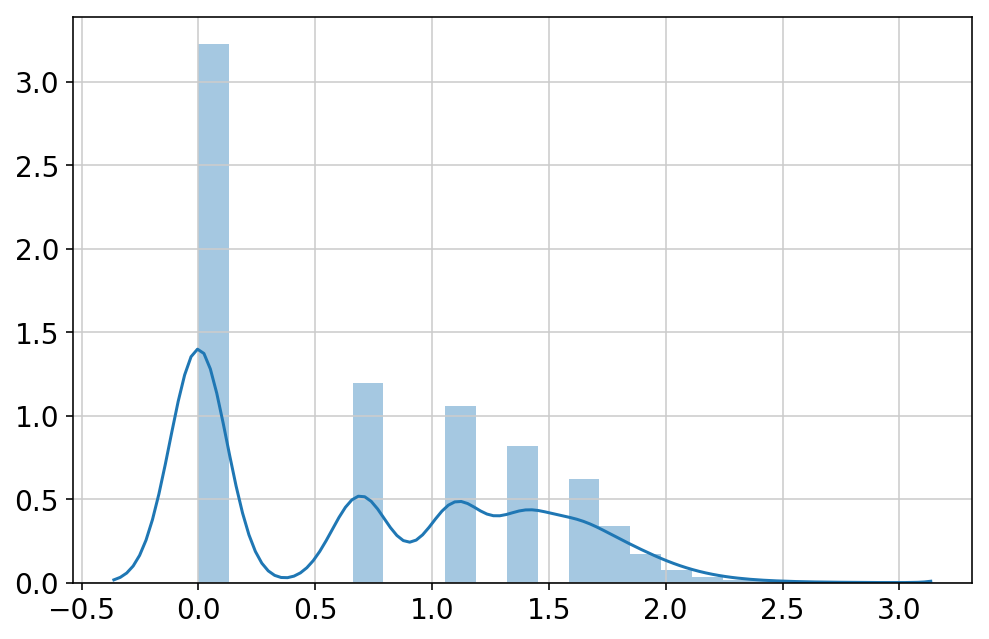

LYZ
Average counts per cell = 17.511156186612578


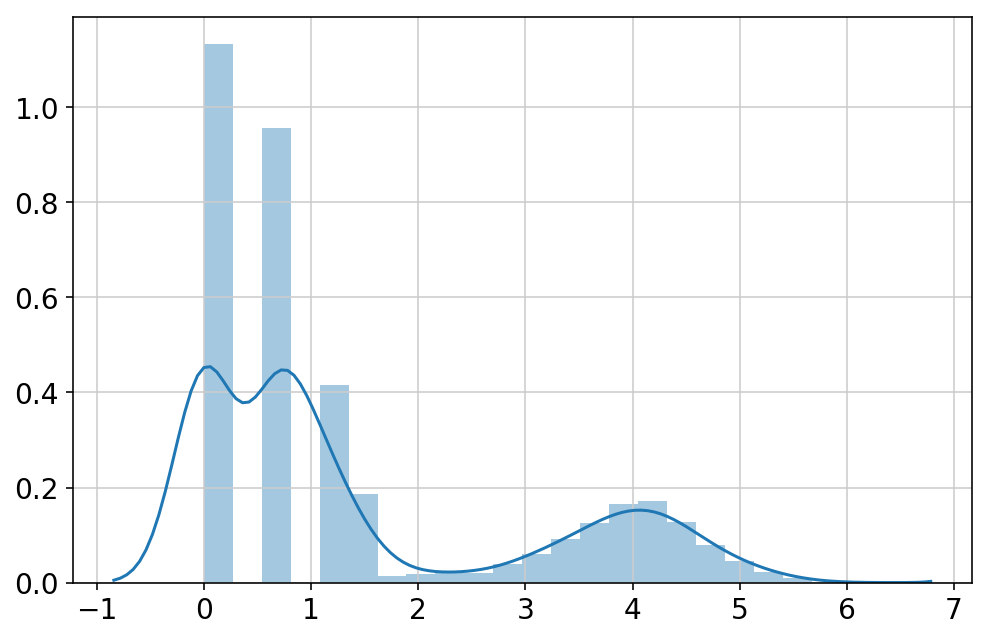

MS4A1
Average counts per cell = 0.65481446128147


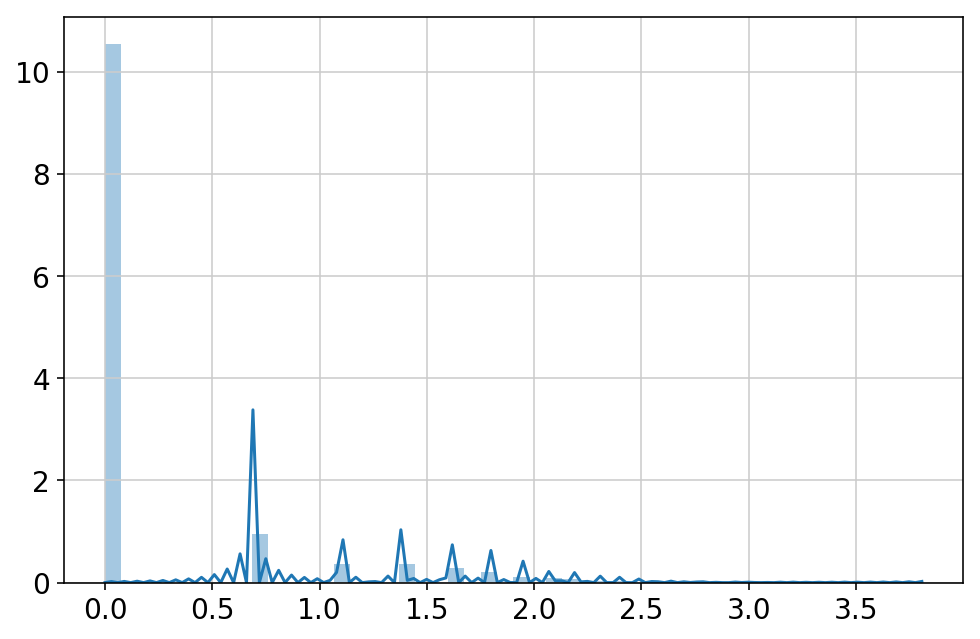

GNLY
Average counts per cell = 1.9725569741081017


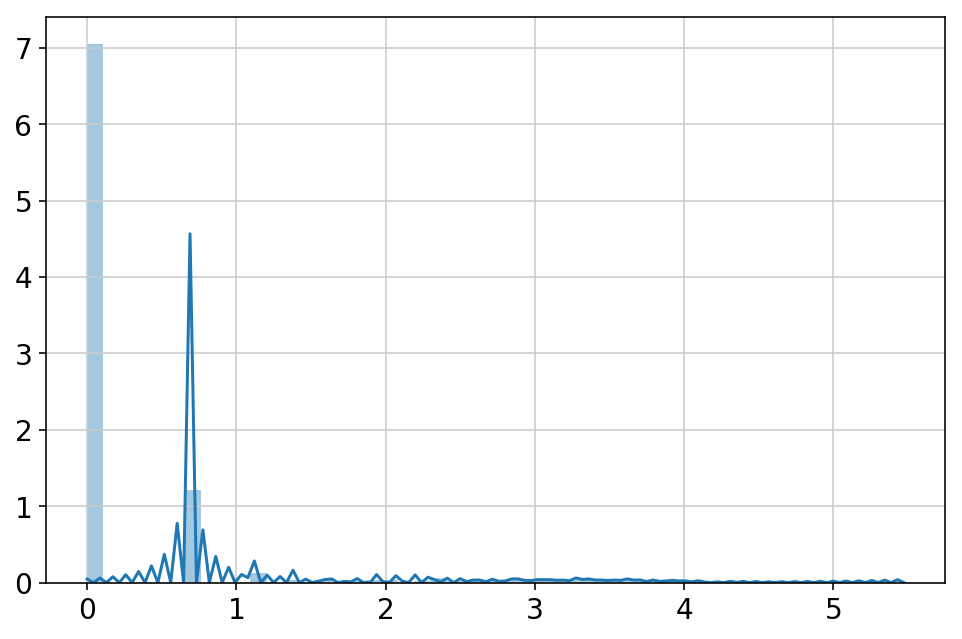

FGFBP2
Average counts per cell = 0.2930437895239232


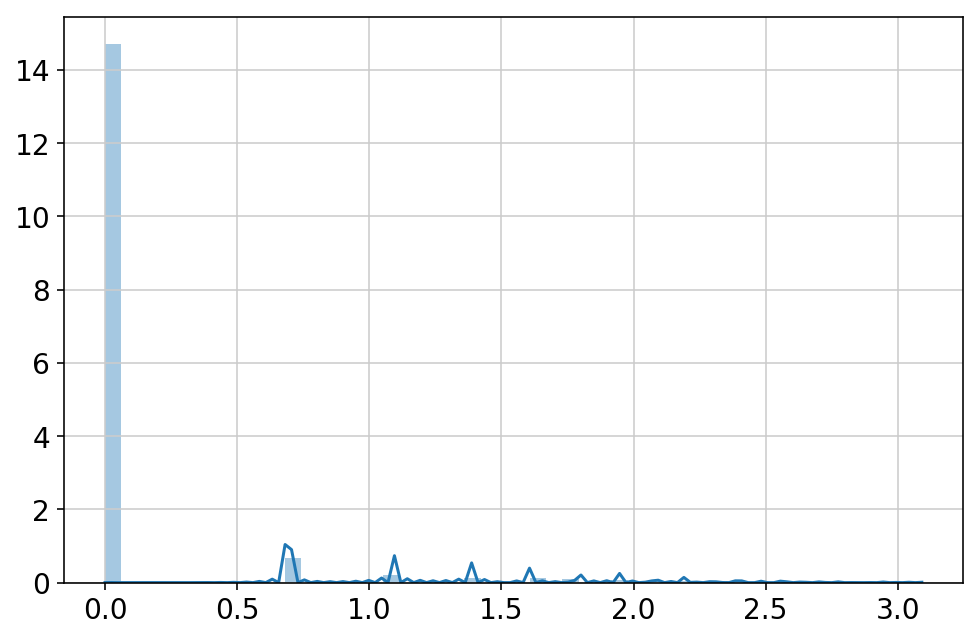

FCER1G
Average counts per cell = 2.8796086385872806


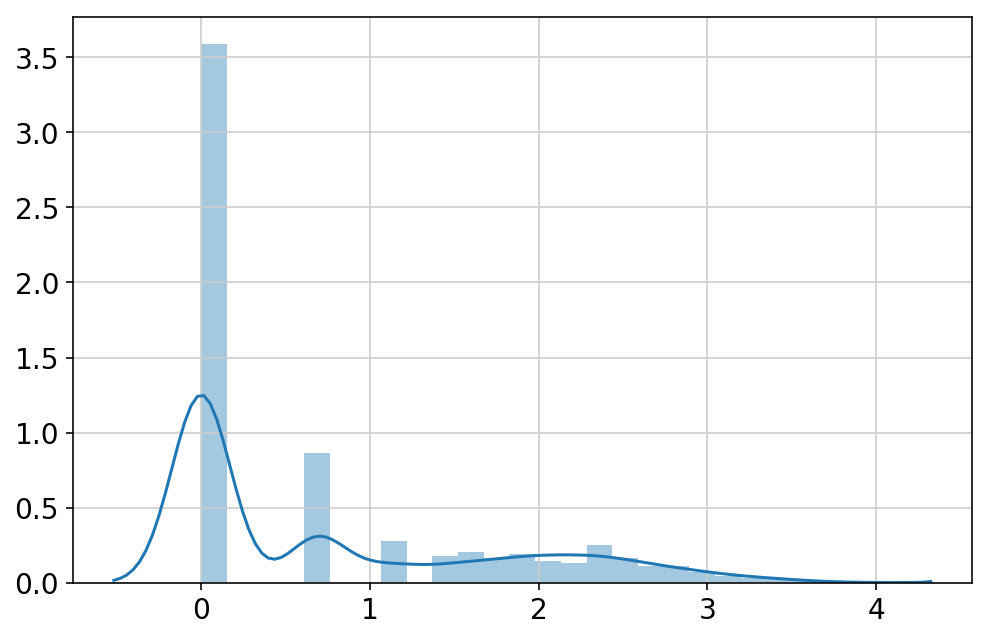

LDHB
Average counts per cell = 2.5530366304736907


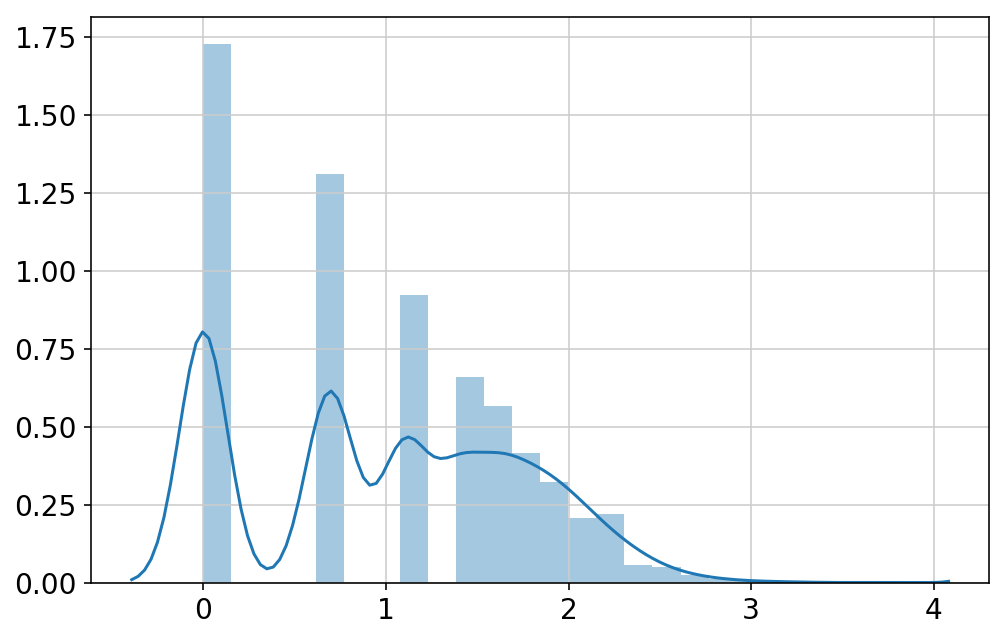

IL7R
Average counts per cell = 1.2459133754921847


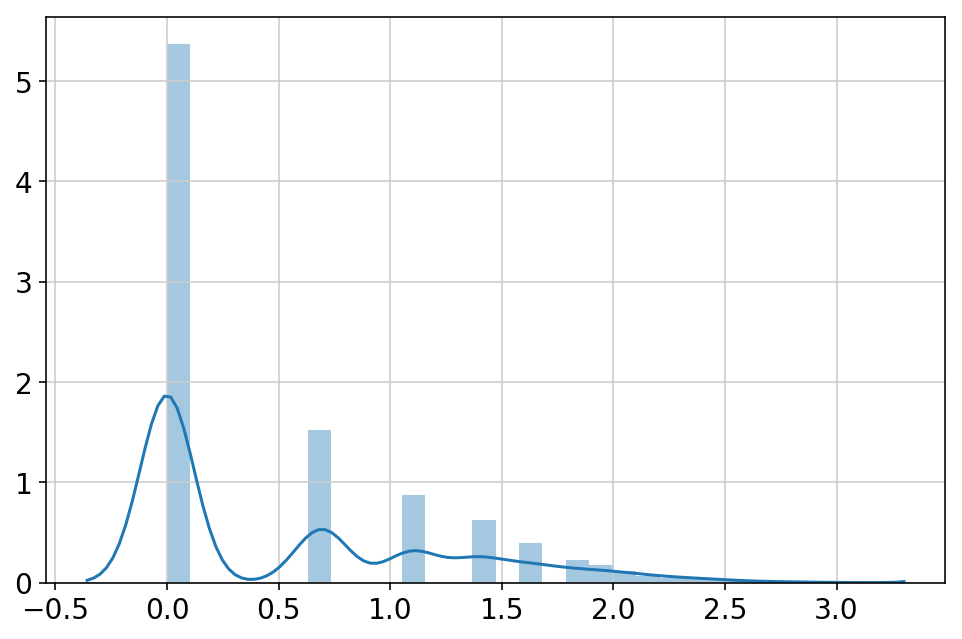

LST1
Average counts per cell = 2.914568667223482


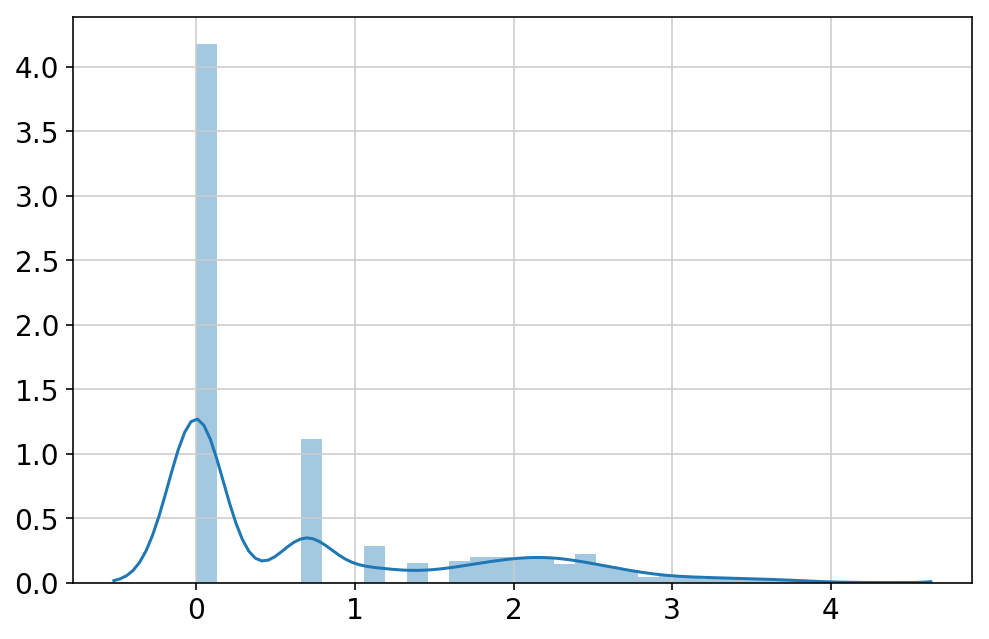

PF4
Average counts per cell = 0.09402219305572128


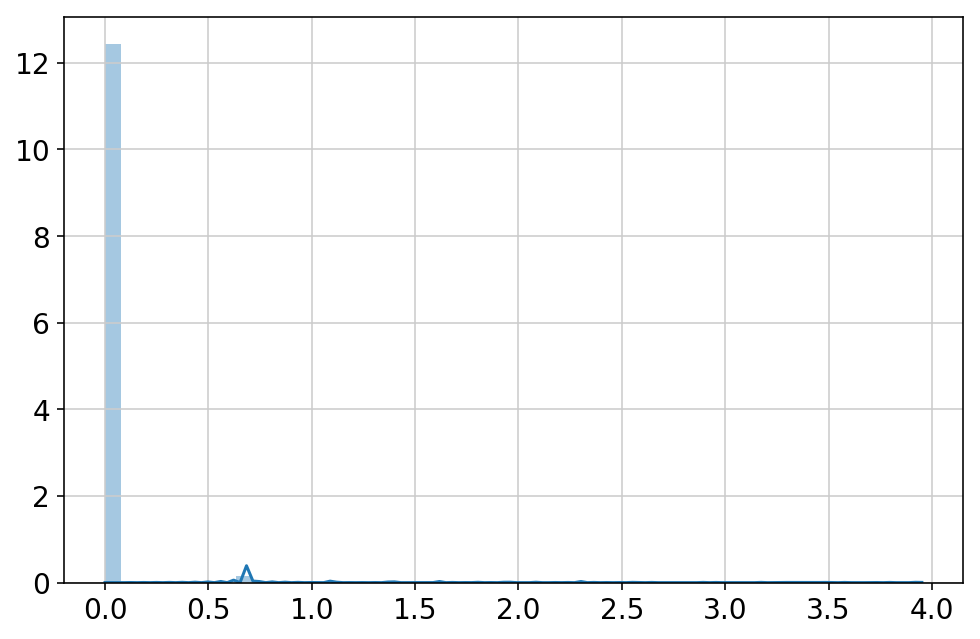

NKG7
Average counts per cell = 2.4571053573559243


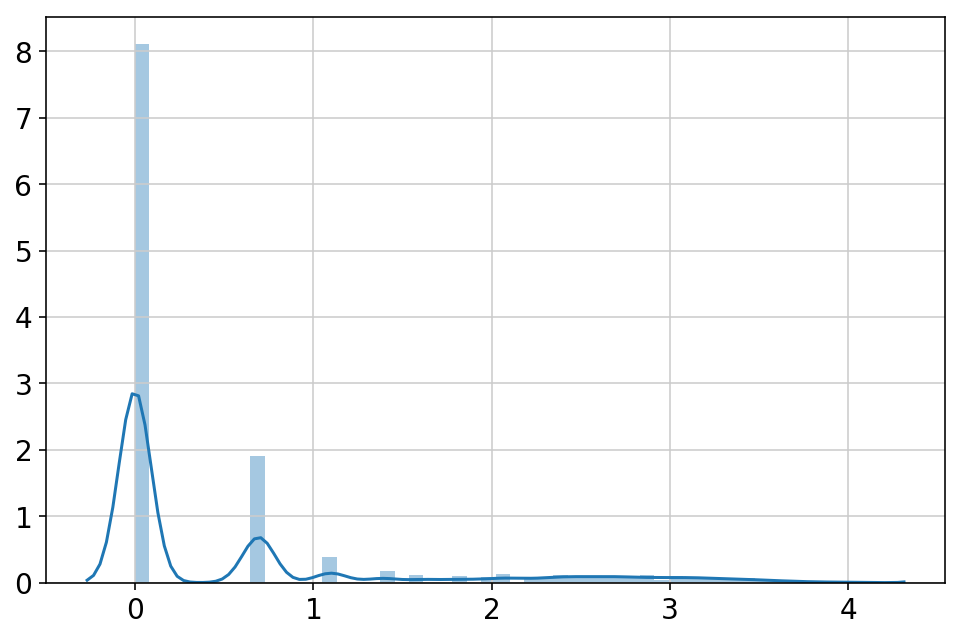

CST3
Average counts per cell = 7.001789762558167


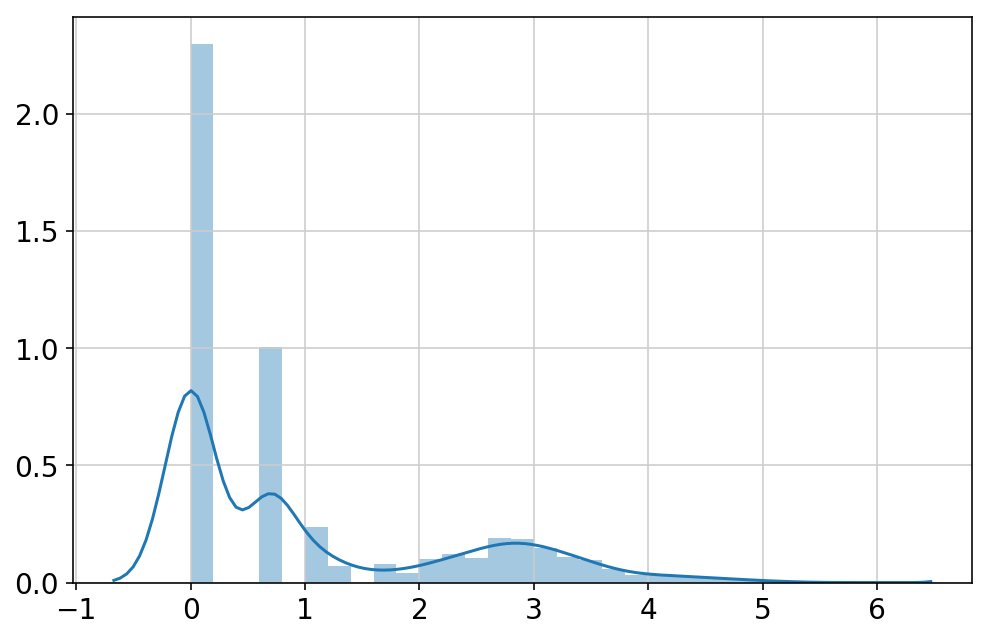

CCR7
Average counts per cell = 0.4827586206896552


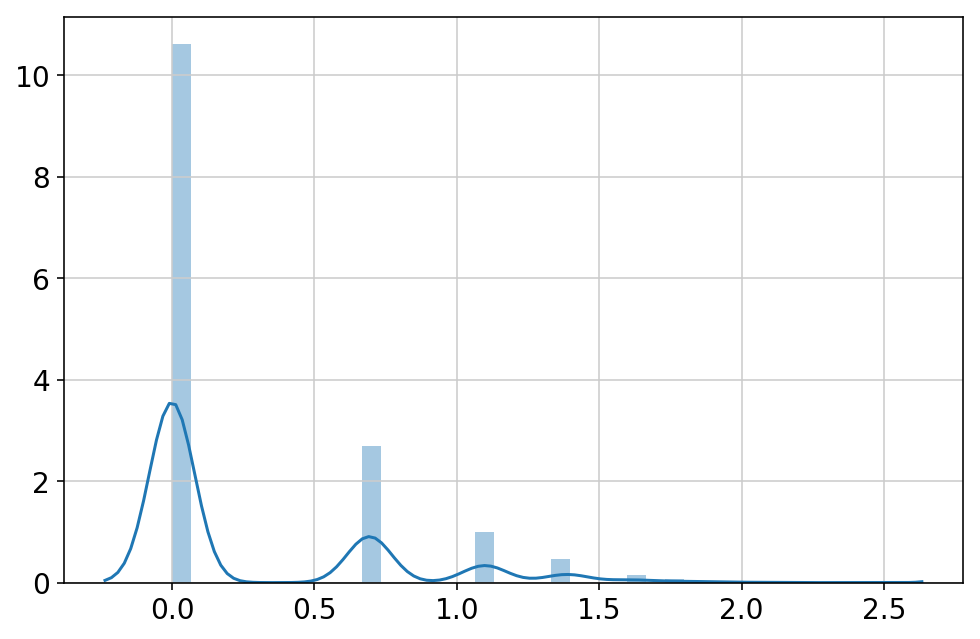

In [44]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
#     sns.distplot(Y)
    sns.distplot(np.log(Y+1))
    plt.show()
#     plt.figure(figsize=[8,5])
#     p_hat_ml,ml_info=ml_1d(Y)
#     plt.plot(ml_info['x'],p_hat_ml)
#     plt.xlim([0,1])
#     plt.title('ML')
#     plt.show()

#     p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
#     print("gamma:",dd_info['gamma'])
    
#     p_gene,x_gene = counts2pdf_1d(Y)
#     x_gene = x_gene/x_gene.max()
#     comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
#     tradeoff_1d(p_gene,x_gene,1e5)
#     print("-------------------------------------------------------------------------")

In [ ]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

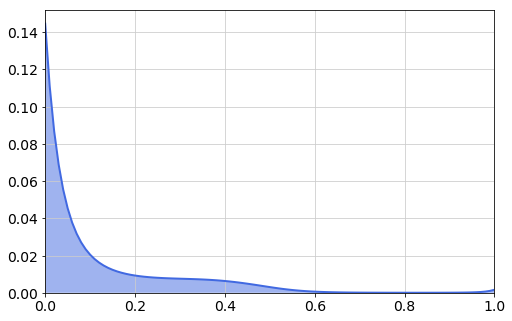

In [218]:
plot_density_1d(p_hat,dd_info['x'])